## SBA PPP Loan Detection - Data Cleaning

SBA PPP Dataset: "public_150k_plus_230630.csv"

In [346]:
pwd!

'/Users/rosehemans/Business Analytics Practicum'

In [347]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Reset if needed below
# warnings.filterwarnings("default")

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', '{:.2f}'.format)

from matplotlib.ticker import ScalarFormatter

In [349]:
# from google.colab import drive
# drive.mount('/content/drive')

In [350]:
# Read SBA PPP Dataset
df = pd.read_csv('public_150k_plus_230630.csv')
#df = pd.read_csv('public_150k_plus_230630.csv')

df = pd.DataFrame(df)
# View first 5 lines
df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150-9662,12/18/2020,Paid in Full,24,100,769358.78,769358.78,0.00,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,N,N,Existing or more than 2 years old,Sumter,SUMTER,SC,29150-9662,SC-05,62.00,325510.00,Unanswered,Unknown/NotStated,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,Corporation,19248,Synovus Bank,COLUMBUS,GA,Unanswered,Unanswered,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420-9000,09/28/2021,Paid in Full,24,100,736927.79,736927.79,0.00,NaN,19248,Synovus Bank,1148 Broadway,COLUMBUS,GA,31901-2429,U,Y,Y,Existing or more than 2 years old,North Charleston,CHARLESTON,SC,29420-9000,SC-06,73.00,561730.00,White,Unknown/NotStated,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,Sole Proprietorship,19248,Synovus Bank,COLUMBUS,GA,Male Owned,Non-Veteran,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,Paid in Full,24,100,691355.00,691355.00,0.00,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SEATTLE,KING,WA,98112-2922,WA-07,75.00,NaN,Unanswered,Unknown/NotStated,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,Non-Profit Organization,9551,"Bank of America, National Association",CHARLOTTE,NC,Unanswered,Unanswered,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,Paid in Full,24,100,499871.00,499871.00,0.00,NaN,9551,"Bank of America, National Association","100 N Tryon St, Ste 170",CHARLOTTE,NC,28202-4024,U,N,N,New Business or 2 years or less,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-23,21.00,236115.00,American Indian or Alaska Native,Not Hispanic or Latino,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,Corporation,9551,"Bank of America, National Association",CHARLOTTE,NC,Male Owned,Non-Veteran,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,Paid in Full,24,100,367437.00,367437.00,0.00,NaN,57328,The Huntington National Bank,17 S High St.,COLUMBUS,OH,43215-3413,U,N,N,Unanswered,NaN,NaN,NaN,NaN,NaN,25.00,484210.00,Unanswered,Unknown/NotStated,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,The Huntington National Bank,COLUMBUS,OH,Unanswered,Unanswered,NaN,370819.35,04/08/2021


In [351]:
# Collect data on null values and Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965552 entries, 0 to 965551
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   LoanNumber                   965552 non-null  int64  
 1   DateApproved                 965552 non-null  object 
 2   SBAOfficeCode                965552 non-null  int64  
 3   ProcessingMethod             965552 non-null  object 
 4   BorrowerName                 965548 non-null  object 
 5   BorrowerAddress              965538 non-null  object 
 6   BorrowerCity                 965540 non-null  object 
 7   BorrowerState                965539 non-null  object 
 8   BorrowerZip                  965539 non-null  object 
 9   LoanStatusDate               948727 non-null  object 
 10  LoanStatus                   965552 non-null  object 
 11  Term                         965552 non-null  int64  
 12  SBAGuarantyPercentage        965552 non-null  int64  
 13 

In [352]:
# Get summary statistics for numerical columns
df.describe()

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount
count,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965506.00,965552.00,965551.00,958924.00,338349.00,963725.00,45524.00,99224.00,22848.00,57426.00,31696.00,965552.00,939037.00
mean,5426351637.85,571.14,36.31,100.00,531600.10,529962.43,5.38,106619.12,51.91,511854.54,14936.93,514265.63,47614.15,56125.27,6878.03,46867.77,14337.97,106167.18,528117.59
std,2551023609.39,262.72,17.30,0.00,743460.36,737069.55,3569.59,131046.83,67.56,181374.39,85013.16,713323.98,158976.11,111237.29,62064.42,102926.96,55472.66,132804.22,731600.47
min,1000007108.00,101.00,0.00,100.00,0.00,150000.00,0.00,20.00,0.00,111110.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.01
25%,3269582653.25,373.00,24.00,100.00,200100.00,200300.00,0.00,32708.00,18.00,336611.00,1.00,195500.00,0.00,13506.00,0.00,8000.00,0.00,29805.00,200722.65
50%,5399787156.00,515.00,24.00,100.00,294984.43,294800.00,0.00,56102.00,30.00,541211.00,1.00,286800.00,9219.38,28835.75,0.00,19440.00,500.00,56102.00,294855.29
75%,7545707252.75,811.00,60.00,100.00,539500.00,538479.25,0.00,113154.00,54.00,623110.00,4500.00,523800.00,40000.00,56168.75,0.00,44000.00,9881.00,110523.00,539213.67
max,9999007109.00,1094.00,203.00,100.00,10000000.00,10000000.00,3346517.14,596038.00,500.00,999990.00,10000000.00,10000000.00,10000000.00,5518277.93,2951590.00,3880000.00,2497617.00,533479.00,10276577.78


In [353]:
# Transform all text to uppercase
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)
df.head(5)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,9547507704,05/01/2020,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,NaN,29150-9662,12/18/2020,PAID IN FULL,24,100,769358.78,769358.78,0.00,NaN,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150-9662,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,NaN,773553.37,11/20/2020
1,9777677704,05/01/2020,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,NaN,29420-9000,09/28/2021,PAID IN FULL,24,100,736927.79,736927.79,0.00,NaN,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420-9000,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,NaN,746336.24,08/12/2021
2,5791407702,05/01/2020,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112-2922,03/17/2021,PAID IN FULL,24,100,691355.00,691355.00,0.00,NaN,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SEATTLE,KING,WA,98112-2922,WA-07,75.00,NaN,UNANSWERED,UNKNOWN/NOTSTATED,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,NON-PROFIT ORGANIZATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,UNANSWERED,UNANSWERED,Y,696677.49,02/10/2021
3,6223567700,05/01/2020,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407-1740,10/16/2021,PAID IN FULL,24,100,499871.00,499871.00,0.00,NaN,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-23,21.00,236115.00,AMERICAN INDIAN OR ALASKA NATIVE,NOT HISPANIC OR LATINO,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,CORPORATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,MALE OWNED,NON-VETERAN,NaN,395264.11,09/10/2021
4,9662437702,05/01/2020,101,PPP,AERO BOX LLC,NaN,NaN,NaN,NaN,08/17/2021,PAID IN FULL,24,100,367437.00,367437.00,0.00,NaN,57328,THE HUNTINGTON NATIONAL BANK,17 S HIGH ST.,COLUMBUS,OH,43215-3413,U,N,N,UNANSWERED,NaN,NaN,NaN,NaN,NaN,25.00,484210.00,UNANSWERED,UNKNOWN/NOTSTATED,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,NaN,57328,THE HUNTINGTON NATIONAL BANK,COLUMBUS,OH,UNANSWERED,UNANSWERED,NaN,370819.35,04/08/2021


In [354]:
# Check unique franchise names
df['FranchiseName'].unique()

array([nan, 'MCDONALDS',
       'GENERAL MOTORS, LLC (CHEVROLET, BUICK, GM, CADILLAC) DEALER SALES AND SERVICE AGREEMENT',
       ..., 'COBBLESTONE INN & SUITES', 'RIPLEY’S BELIEVE IT OR NOT!®',
       "BELLACINO'S PIZZA AND GRINDERS"], dtype=object)

In [355]:
# Count total rows with null values for each column
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        4
BorrowerAddress                    14
BorrowerCity                       12
BorrowerState                      13
BorrowerZip                        13
LoanStatusDate                  16825
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  46
FranchiseName                  930147
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [356]:
# Examine unique values for categorical responses
unique_values_dict = {}

# Define categorical columns
columns = ['ProcessingMethod', 'LoanStatus', 'RuralUrbanIndicator', 'HubzoneIndicator', 'LMIIndicator', 'BusinessAgeDescription', 'Race','Ethnicity', 'BusinessType', 'Gender', 'Veteran', 'NonProfit', 'Term', 'SBAGuarantyPercentage']

# Iterate through the specified columns
for column_name in columns:
    # Extract unique values from the column, remove NaN values, and convert to a list
    unique_values = df[column_name].dropna().unique().tolist()

    # Add the unique values to the dictionary with the column name as the key
    unique_values_dict[column_name] = unique_values

# Display the resulting dictionary with a space between each key-value pair
for key, value in unique_values_dict.items():
    print(f"{key}: {value}\n")

ProcessingMethod: ['PPP', 'PPS']

LoanStatus: ['PAID IN FULL', 'EXEMPTION 4', 'CHARGED OFF']

RuralUrbanIndicator: ['U', 'R']

HubzoneIndicator: ['N', 'Y']

LMIIndicator: ['N', 'Y']

BusinessAgeDescription: ['EXISTING OR MORE THAN 2 YEARS OLD', 'NEW BUSINESS OR 2 YEARS OR LESS', 'UNANSWERED', 'CHANGE OF OWNERSHIP', 'STARTUP, LOAN FUNDS WILL OPEN BUSINESS']

Race: ['UNANSWERED', 'WHITE', 'AMERICAN INDIAN OR ALASKA NATIVE', 'BLACK OR AFRICAN AMERICAN', 'ASIAN', 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'ESKIMO & ALEUT', 'MULTI GROUP', 'PUERTO RICAN']

Ethnicity: ['UNKNOWN/NOTSTATED', 'NOT HISPANIC OR LATINO', 'HISPANIC OR LATINO']

BusinessType: ['CORPORATION', 'SOLE PROPRIETORSHIP', 'NON-PROFIT ORGANIZATION', 'SUBCHAPTER S CORPORATION', 'LIMITED  LIABILITY COMPANY(LLC)', '501(C)3 – NON PROFIT', 'COOPERATIVE', 'PARTNERSHIP', 'PROFESSIONAL ASSOCIATION', 'EMPLOYEE STOCK OWNERSHIP PLAN(ESOP)', 'LIMITED LIABILITY PARTNERSHIP', 'NON-PROFIT CHILDCARE CENTER', 'TRUST', 'JOINT VENTURE', '501(

The HUBZone program is a Small Business Administration (SBA) program that helps small businesses in economically distressed communities. The program provides contracting assistance to these businesses, which are called Historically Underutilized Business Zones (HUBZones). The goal of the program is to promote job growth, capital investment, and economic development in these areas.

In [357]:
# Count rows with missing values
num_rows_missing = (df.isnull().sum(axis=1) > 0).sum()

print(f"Total number of rows with missing values: {num_rows_missing}")

Total number of rows with missing values: 965551


Only one row has no missing values (total = 965552)

## Data Wrangling - preparation for modelling

In [358]:
# Transform date-related columns to DateTime DType
df[['DateApproved', 'LoanStatusDate', 'ForgivenessDate']] = df[['DateApproved', 'LoanStatusDate', 'ForgivenessDate']].apply(pd.to_datetime)

In [359]:
# Replace missing qualitative data for borrower columns

borrower_columns = ['BorrowerName','BorrowerAddress', 'BorrowerCity', 'BorrowerState', 'BorrowerZip' ]

for column in borrower_columns:
    df[column] = df[column].fillna('UNKNOWN/NOTSTATED')

df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        0
BorrowerAddress                     0
BorrowerCity                        0
BorrowerState                       0
BorrowerZip                         0
LoanStatusDate                  16825
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  46
FranchiseName                  930147
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [360]:
# Replace LoanStatusDate missing values with mean date
df['LoanStatusDate'].describe()

count                  948727
unique                    923
top       2021-01-21 00:00:00
freq                    13662
first     2020-04-30 00:00:00
last      2023-06-30 00:00:00
Name: LoanStatusDate, dtype: object

In [361]:
# Check mean loan status date
df['LoanStatusDate'].mean()

Timestamp('2021-08-14 20:21:42.854034944')

In [362]:
# Check median loan status date
df['LoanStatusDate'].median()

Timestamp('2021-07-22 00:00:00')

<AxesSubplot:>

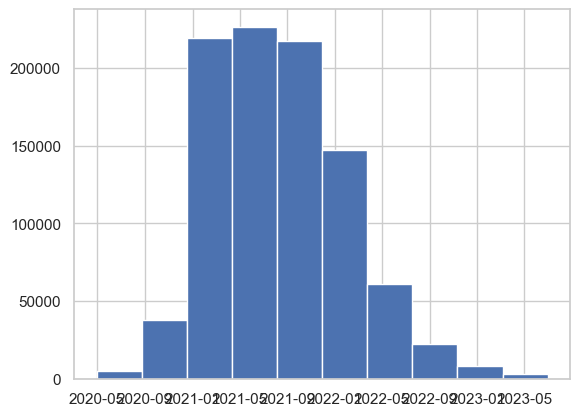

In [363]:
df['LoanStatusDate'].hist()

In [364]:
# Replace NaN LoanStatusDate with median date due to right skew
df['LoanStatusDate'] = df['LoanStatusDate'].fillna(df['LoanStatusDate'].median())
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        0
BorrowerAddress                     0
BorrowerCity                        0
BorrowerState                       0
BorrowerZip                         0
LoanStatusDate                      0
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                  46
FranchiseName                  930147
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [365]:
# Display rows with NaN undisbursed amounts
df[df['UndisbursedAmount'].isna()]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
8451,9424008300,2021-01-30,459,PPS,ST. BERNARD PREPARATORY SCHOOL,1600 SAINT BERNARD AVE SE,CULLMAN,AL,35055-3057,2021-08-11,PAID IN FULL,60,100,272384.15,272384.15,NaN,NaN,86278,FIRST COMMUNITY BANK OF CULLMAN,420 2ND AVE SW,CULLMAN,AL,35055-4107,R,N,N,EXISTING OR MORE THAN 2 YEARS OLD,CULLMAN,CULLMAN,AL,35055-3057,AL-04,34.00,611110.00,UNANSWERED,NOT HISPANIC OR LATINO,1.00,272383.15,NaN,NaN,NaN,NaN,NaN,CORPORATION,86278,FIRST COMMUNITY BANK OF CULLMAN,CULLMAN,AL,UNANSWERED,UNANSWERED,NaN,274116.82,2021-09-22
15117,5118488602,2021-03-20,669,PPS,MARTIN KNEE AND SPORTS MEDICINE CENTER PA,5320 W MARKHAM ST,LITTLE ROCK,AR,72205-3528,2021-04-25,PAID IN FULL,60,100,476467.50,476467.50,NaN,NaN,121631,ARMOR BANK,715 N WASHINGTON,FORREST CITY,AR,72335-2859,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,LITTLE ROCK,PULASKI,AR,72205-3528,AR-02,36.00,621111.00,WHITE,NOT HISPANIC OR LATINO,NaN,476467.50,NaN,NaN,NaN,NaN,NaN,PROFESSIONAL ASSOCIATION,121631,ARMOR BANK,FORREST CITY,AR,MALE OWNED,UNANSWERED,NaN,477890.38,2021-07-12
15166,5865768302,2021-01-26,669,PPS,NATIONAL CONTRACT FLOORING LLC,15 REDCOAT LN,LITTLE ROCK,AR,72227-2310,2021-04-25,PAID IN FULL,60,100,466486.00,466486.00,NaN,NaN,121631,ARMOR BANK,715 N WASHINGTON,FORREST CITY,AR,72335-2859,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,LITTLE ROCK,PULASKI,AR,72227-2310,AR-02,38.00,442210.00,UNANSWERED,NOT HISPANIC OR LATINO,1.00,466484.00,NaN,NaN,NaN,NaN,NaN,LIMITED LIABILITY COMPANY(LLC),121631,ARMOR BANK,FORREST CITY,AR,MALE OWNED,NON-VETERAN,NaN,468224.14,2021-06-15
40410,7209977801,2020-06-03,920,PPP,FONTANA CK INC,16119 FOOTHILL BLVD,FONTANA,CA,92335-3375,2021-07-22,EXEMPTION 4,60,100,1908595.00,1908595.00,NaN,NaN,509316,"HARVEST SMALL BUSINESS FINANCE, LLC",24422 AVENIDA DE LA CARLOTA SUITE 232,LAGUNA HILLS,CA,92653,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,FONTANA,SAN BERNARDINO,CA,92335-3375,CA-35,174.00,722320.00,BLACK OR AFRICAN AMERICAN,UNKNOWN/NOTSTATED,NaN,1908595.00,NaN,NaN,NaN,NaN,NaN,SUBCHAPTER S CORPORATION,509316,"HARVEST SMALL BUSINESS FINANCE, LLC",LAGUNA HILLS,CA,UNANSWERED,UNANSWERED,NaN,NaN,NaT
49242,4912637802,2020-05-29,920,PPP,CKSB LLC,10600 MAGNOLIA AVE,ANAHEIM,CA,92804-5819,2021-07-22,EXEMPTION 4,60,100,1020230.00,1020230.00,NaN,NaN,509316,"HARVEST SMALL BUSINESS FINANCE, LLC",24422 AVENIDA DE LA CARLOTA SUITE 232,LAGUNA HILLS,CA,92653,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,ANAHEIM,ORANGE,CA,92804-5819,CA-46,127.00,811192.00,ASIAN,UNKNOWN/NOTSTATED,NaN,1020230.00,NaN,NaN,NaN,NaN,NaN,LIMITED LIABILITY COMPANY(LLC),509316,"HARVEST SMALL BUSINESS FINANCE, LLC",LAGUNA HILLS,CA,MALE OWNED,UNANSWERED,NaN,NaN,NaT
86509,4233187709,2020-05-03,920,PPP,SCHUMANN ROSENBERG &AMP; AREVALO LLP,3100 BRISTOL STREET SUITE 100,COSTA MESA,CA,92626,2021-11-03,PAID IN FULL,24,100,366945.00,366945.00,NaN,NaN,121536,CUSTOMERS BANK,40 GENERAL WARREN BLVD,MALVERN,PA,19355,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,COSTA MESA,ORANGE,CA,92626,CA-46,23.00,NaN,UNANSWERED,UNKNOWN/NOTSTATED,NaN,381942.00,NaN,NaN,NaN,NaN,NaN,LIMITED LIABILITY PARTNERSHIP,12096,"WELLS FARGO BANK, NATIONAL ASSOCIATION",SIOUX FALLS,SD,UNANSWERED,UNANSWERED,NaN,374243.69,2022-05-04
1065

In [366]:
# Check mean and median undisbursed amount for skew and missing values de
print(df['UndisbursedAmount'].mean())

5.383155485310293


In [367]:
print(df['UndisbursedAmount'].median())

0.0


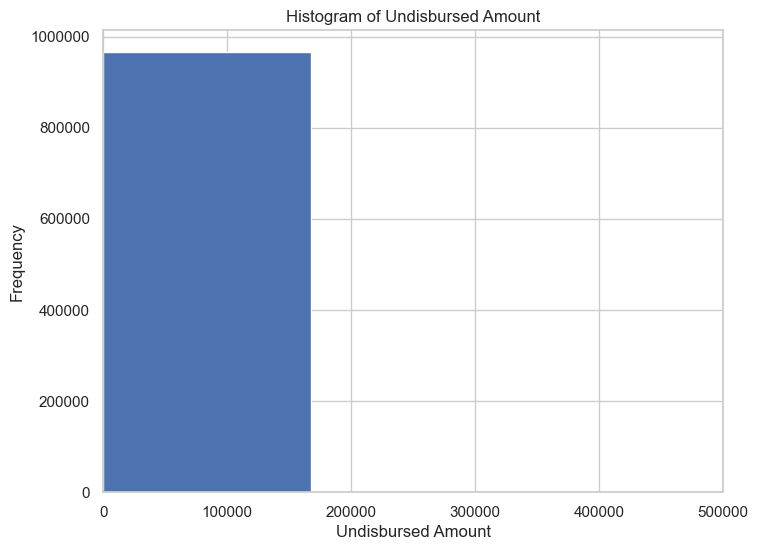

In [368]:
# Check distribution, mean and median values for UndisbursedAmount
plt.figure(figsize=(8, 6))
plt.hist(df['UndisbursedAmount'], bins=20)
plt.xlim(0,500000)
plt.xlabel('Undisbursed Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Undisbursed Amount')
plt.ticklabel_format(style='plain')
plt.show()

In [369]:
df['UndisbursedAmount'].describe()

count    965506.00
mean          5.38
std        3569.59
min           0.00
25%           0.00
50%           0.00
75%           0.00
max     3346517.14
Name: UndisbursedAmount, dtype: float64

In [370]:
# Replace NaN UndisbursedAmount values with mean
df['UndisbursedAmount'] = df['UndisbursedAmount'].fillna(df['UndisbursedAmount'].mean())
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        0
BorrowerAddress                     0
BorrowerCity                        0
BorrowerState                       0
BorrowerZip                         0
LoanStatusDate                      0
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                   0
FranchiseName                  930147
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [371]:
# Replace NaN FranchiseName values with 'Unanswered'
df['FranchiseName'] = df['FranchiseName'].fillna('UNKNOWN/NOTSTATED')
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        0
BorrowerAddress                     0
BorrowerCity                        0
BorrowerState                       0
BorrowerZip                         0
LoanStatusDate                      0
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                   0
FranchiseName                       0
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [372]:
df['BusinessAgeDescription'].value_counts()

EXISTING OR MORE THAN 2 YEARS OLD         859324
NEW BUSINESS OR 2 YEARS OR LESS            54479
UNANSWERED                                 51051
CHANGE OF OWNERSHIP                          422
STARTUP, LOAN FUNDS WILL OPEN BUSINESS       275
Name: BusinessAgeDescription, dtype: int64

In [373]:
# Replace NaN BusinessAgeDescription with 'Unanswered'
df['BusinessAgeDescription'] = df['BusinessAgeDescription'].fillna('UNKNOWN/NOTSTATED')
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        0
BorrowerAddress                     0
BorrowerCity                        0
BorrowerState                       0
BorrowerZip                         0
LoanStatusDate                      0
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                   0
FranchiseName                       0
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [374]:
df['BusinessAgeDescription'] = df['BusinessAgeDescription'].replace('UNANSWERED', 'UNKNOWN/NOTSTATED')

In [375]:
df['BusinessAgeDescription'].value_counts()

EXISTING OR MORE THAN 2 YEARS OLD         859324
NEW BUSINESS OR 2 YEARS OR LESS            54479
UNKNOWN/NOTSTATED                          51052
CHANGE OF OWNERSHIP                          422
STARTUP, LOAN FUNDS WILL OPEN BUSINESS       275
Name: BusinessAgeDescription, dtype: int64

In [376]:
# Replace missing qualitative data for project columns

project_columns = ['ProjectCity','ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD' ]

for column in project_columns:
    df[column] = df[column].fillna('UNKNOWN/NOTSTATED')

df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        0
BorrowerAddress                     0
BorrowerCity                        0
BorrowerState                       0
BorrowerZip                         0
LoanStatusDate                      0
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                   0
FranchiseName                       0
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [377]:
# Replace NaN JobsReported with mean
df['JobsReported'].describe()

count   965551.00
mean        51.91
std         67.56
min          0.00
25%         18.00
50%         30.00
75%         54.00
max        500.00
Name: JobsReported, dtype: float64

In [378]:
print(df['JobsReported'].mean())
print(df['JobsReported'].median())

51.91092443589204
30.0


<AxesSubplot:>

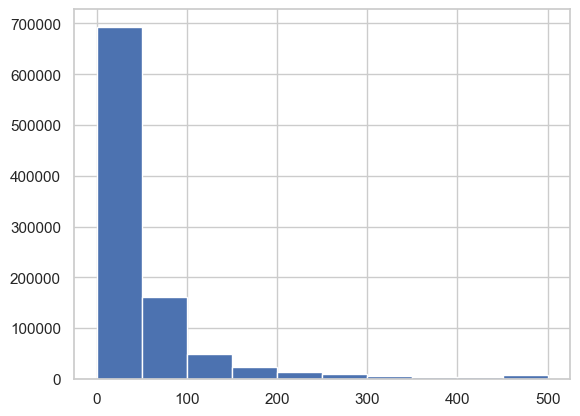

In [379]:
df['JobsReported'].hist()

In [380]:
df['JobsReported'] = df['JobsReported'].fillna(df['JobsReported'].median())
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        0
BorrowerAddress                     0
BorrowerCity                        0
BorrowerState                       0
BorrowerZip                         0
LoanStatusDate                      0
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                   0
FranchiseName                       0
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [381]:
df['BusinessType'].value_counts()

CORPORATION                            415684
LIMITED  LIABILITY COMPANY(LLC)        261058
SUBCHAPTER S CORPORATION               174799
NON-PROFIT ORGANIZATION                 55904
PARTNERSHIP                             18158
LIMITED LIABILITY PARTNERSHIP           12724
SOLE PROPRIETORSHIP                     12255
PROFESSIONAL ASSOCIATION                 6270
COOPERATIVE                              2435
501(C)3 – NON PROFIT                     1772
NON-PROFIT CHILDCARE CENTER               900
501(C)6 – NON PROFIT MEMBERSHIP           762
EMPLOYEE STOCK OWNERSHIP PLAN(ESOP)       641
SELF-EMPLOYED INDIVIDUALS                 494
TRUST                                     397
HOUSING CO-OP                             152
JOINT VENTURE                             125
INDEPENDENT CONTRACTORS                   112
SINGLE MEMBER LLC                          78
TRIBAL CONCERNS                            64
TENANT IN COMMON                           30
501(C) – NON PROFIT EXCEPT 3,4,6, 

In [382]:
df['BusinessType'] = df['BusinessType'].fillna('UNKNOWN/NOTSTATED')
df.isnull().sum()

LoanNumber                          0
DateApproved                        0
SBAOfficeCode                       0
ProcessingMethod                    0
BorrowerName                        0
BorrowerAddress                     0
BorrowerCity                        0
BorrowerState                       0
BorrowerZip                         0
LoanStatusDate                      0
LoanStatus                          0
Term                                0
SBAGuarantyPercentage               0
InitialApprovalAmount               0
CurrentApprovalAmount               0
UndisbursedAmount                   0
FranchiseName                       0
ServicingLenderLocationID           0
ServicingLenderName                 0
ServicingLenderAddress              0
ServicingLenderCity                 0
ServicingLenderState                0
ServicingLenderZip                  0
RuralUrbanIndicator                 0
HubzoneIndicator                    0
LMIIndicator                        0
BusinessAgeD

In [383]:
# Fill NaN NonProfit with 'N'
df['NonProfit'] = df['NonProfit'].fillna('N')
df['NonProfit'].value_counts()

N    906202
Y     59350
Name: NonProfit, dtype: int64

In [384]:
purpose_columns = ['UTILITIES_PROCEED', 'PAYROLL_PROCEED',
                     'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED',
                     'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED']

# Loop through columns to create new binary columns to establish if loan was used for each purpose

for column in purpose_columns:
    new_column_name = column + '_purpose'
    df[new_column_name] = df[column].notna().astype(int)

df.head(20)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150-9662,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150-9662,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,NaN,769358.78,NaN,NaN,NaN,NaN,NaN,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420-9000,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420-9000,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,NaN,736927.79,NaN,NaN,NaN,NaN,NaN,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,UNKNOWN/NOTSTATED,98112-2922,2021-03-17,PAID IN FULL,24,100,691355.00,691355.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SEATTLE,KING,WA,98112-2922,WA-07,75.00,NaN,UNANSWERED,UNKNOWN/NOTSTATED,NaN,691355.00,NaN,NaN,NaN,NaN,NaN,NON-PROFIT ORGANIZATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,UNANSWERED,UNANSWERED,Y,696677.49,2021-02-10,0,1,0,0,0,0,0
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,UNKNOWN/NOTSTATED,92407-1740,2021-10-16,PAID IN FULL,24,100,499871.00,499871.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-23,21.00,236115.00,AMERICAN INDIAN OR ALASKA NATIVE,NOT HISPANIC OR LATINO,NaN,499871.00,NaN,NaN,NaN,NaN,NaN,CORPORATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,MALE OWNED,NON-VETERAN,N,395264.11,2021-09-10,0,1,0,0,0,0,0
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,2021-08-17,PAID IN FULL,24,100,367437.00,367437.00,0.00,UNKNOWN/NOTSTATED,57328,THE HUNTINGTON NATIONAL BANK,17 S HIGH ST.,COLUMBUS,OH,43215-3413,U,N,N,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,25.00,484210.00,UNANSWERED,UNKNOWN/NOTSTATED,NaN,367437.00,NaN,NaN,NaN,NaN,NaN,UNKNOWN/NOTSTATED,57328,THE HUNTINGTON NATIONAL BANK,COLUMBUS,OH,UNANSWERED,UNANSWERED,N,370819.35,2021-04-08,0,1,0,0,0,0,0
5,9774337701,2020-05-01,101,PPP,HUDSON EXTRUSIONS INC.,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,2021-11-17,PAID IN FULL,24,100,328840.00,328

In [385]:
df['MORTGAGE_INTEREST_PROCEED_purpose'].value_counts()

0    920028
1     45524
Name: MORTGAGE_INTEREST_PROCEED_purpose, dtype: int64

In [386]:
# Replace NaN Proceed values with 0

proceed_columns = ['UTILITIES_PROCEED','PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED' ]

for column in proceed_columns:
    df[column] = df[column].fillna(0)

df.isnull().sum()

LoanNumber                               0
DateApproved                             0
SBAOfficeCode                            0
ProcessingMethod                         0
BorrowerName                             0
BorrowerAddress                          0
BorrowerCity                             0
BorrowerState                            0
BorrowerZip                              0
LoanStatusDate                           0
LoanStatus                               0
Term                                     0
SBAGuarantyPercentage                    0
InitialApprovalAmount                    0
CurrentApprovalAmount                    0
UndisbursedAmount                        0
FranchiseName                            0
ServicingLenderLocationID                0
ServicingLenderName                      0
ServicingLenderAddress                   0
ServicingLenderCity                      0
ServicingLenderState                     0
ServicingLenderZip                       0
RuralUrbanI

We are able to download NAICS code size standards from the following source:

https://catalog.data.gov/dataset/small-business-administration-sba-size-standards-table

In [387]:
#naics = pd.read_csv('Small_Business_Administration__SBA__Size_Standards_Table.csv')
naics = pd.read_excel('Table of Size Standards_Effective March 17, 2023_.xlsx', sheet_name = 'table_of_size_standards-all')
naics.head(10)

,NAICS Codes,NAICS Industry Description,Size standards \nin millions of dollars,Size standards in number of employees,Footnotes
0,NaN,"Sector 11 – Agriculture, Forestry, Fishing and...",NaN,NaN,NaN
1,Subsector 111 – Crop Production,NaN,NaN,NaN,NaN
2,111110,Soybean Farming,2.25,NaN,NaN
3,111120,Oilseed (except Soybean) Farming,2.25,NaN,NaN
4,111130,Dry Pea and Bean Farming,2.75,NaN,NaN
5,111140,Wheat Farming,2.25,NaN,NaN
6,111150,Corn Farming,2.50,NaN,NaN
7,111160,Rice Farming,2.50,NaN,NaN
8,111191,Oilseed and Grain Combination Farming,2.25,NaN,NaN
9,111199,All Other Grain Farming,2.25,NaN,NaN


In [388]:
naics['Size Standards in millions of dollars'] = naics['Size standards \nin millions of dollars']

In [389]:
naics = naics.rename(columns={'Size standards \nin millions of dollars': 'Size Standards in millions of dollars'})

In [390]:
naics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NAICS Codes                            1082 non-null   object 
 1   NAICS Industry Description             1019 non-null   object 
 2   Size Standards in millions of dollars  513 non-null    object 
 3   Size standards in number of employees  483 non-null    float64
 4   Footnotes                              37 non-null     object 
 5   Size Standards in millions of dollars  513 non-null    object 
dtypes: float64(1), object(5)
memory usage: 51.9+ KB


In [391]:
naics = naics.dropna(subset=['NAICS Codes'])
naics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1082 entries, 1 to 1102
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NAICS Codes                            1082 non-null   object 
 1   NAICS Industry Description             996 non-null    object 
 2   Size Standards in millions of dollars  513 non-null    object 
 3   Size standards in number of employees  483 non-null    float64
 4   Footnotes                              36 non-null     object 
 5   Size Standards in millions of dollars  513 non-null    object 
dtypes: float64(1), object(5)
memory usage: 59.2+ KB


In [392]:
naics = pd.DataFrame(naics)
naics.head()

,NAICS Codes,NAICS Industry Description,Size Standards in millions of dollars,Size standards in number of employees,Footnotes,Size Standards in millions of dollars
1,Subsector 111 – Crop Production,NaN,NaN,NaN,NaN,NaN
2,111110,Soybean Farming,2.25,NaN,NaN,2.25
3,111120,Oilseed (except Soybean) Farming,2.25,NaN,NaN,2.25
4,111130,Dry Pea and Bean Farming,2.75,NaN,NaN,2.75
5,111140,Wheat Farming,2.25,NaN,NaN,2.25


In [393]:
naics.describe()

,Size standards in number of employees
count,483.00
mean,834.58
std,401.75
min,100.00
25%,550.00
50%,850.00
75%,1150.00
max,1500.00


In [394]:
# Initialize empty dictionaries
naics_dict = {}
naics_dict2 = {}
naics_dict3 = {}

# Populate the dictionaries
for index, row in naics.iterrows():
    naics_dict[row['NAICS Codes']] = row['NAICS Industry Description']
    naics_dict2[row['NAICS Codes']] = row['Size Standards in millions of dollars']
    naics_dict3[row['NAICS Codes']] = row['Size standards in number of employees']

# Create new columns in df with the values from the dictionaries
df['NAICS Industry Description'] = df['NAICSCode'].map(naics_dict)
df['Size standards in millions of dollars'] = df['NAICSCode'].map(naics_dict2)
df['Size standards in number of employees'] = df['NAICSCode'].map(naics_dict3)

df.head()


,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in millions of dollars,Size standards in number of employees
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150-9662,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150-9662,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,Size Standards in millions of dollars NaN S...,1000.00
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420-9000,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420-9000,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Landscaping Services,Size Standards in millions of dollars 9.50 S...,NaN
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,UNKNOWN/NOTSTATED,98112-2922,2021-03-17,PAID IN FULL,24,100,691355.00,691355.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SEATTLE,KING,WA,98112-2922,WA-07,75.00,NaN,UNANSWERED,UNKNOWN/NOTSTATED,0.00,691355.00,0.00,0.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,UNANSWERED,UNANSWERED,Y,696677.49,2021-02-10,0,1,0,0,0,0,0,NaN,NaN,NaN
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,UNKNOWN/NOTSTATED,92407-1740,2021-10-16,PAID IN FULL,24,100,499871.00,499871.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-23,21.00,236115.00,AMERICAN INDIAN OR ALASKA NATIVE,NOT HISPANIC OR LATINO,0.00,499871.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,MALE OWNED,NON-VETERAN,N,395264.11,2021-09-10,0,1,0,0,0,0,0,New Single-family Housing Construction (Except...,Size Standards in millions of dollars 45 Si...,NaN
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,2021-08-17,PAID IN FULL,24,100,367437.00,367437.00,0.00,UNKNOWN/NOTSTATED,57328,THE HUNTINGTON NATIONAL BANK,17 S HIGH ST.,COLUMBUS,OH,43215-3413,U,N,N,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NO

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965552 entries, 0 to 965551
Data columns (total 63 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   LoanNumber                             965552 non-null  int64         
 1   DateApproved                           965552 non-null  datetime64[ns]
 2   SBAOfficeCode                          965552 non-null  int64         
 3   ProcessingMethod                       965552 non-null  object        
 4   BorrowerName                           965552 non-null  object        
 5   BorrowerAddress                        965552 non-null  object        
 6   BorrowerCity                           965552 non-null  object        
 7   BorrowerState                          965552 non-null  object        
 8   BorrowerZip                            965552 non-null  object        
 9   LoanStatusDate                         965552 no

In [396]:
df.isnull().sum()

LoanNumber                                    0
DateApproved                                  0
SBAOfficeCode                                 0
ProcessingMethod                              0
BorrowerName                                  0
BorrowerAddress                               0
BorrowerCity                                  0
BorrowerState                                 0
BorrowerZip                                   0
LoanStatusDate                                0
LoanStatus                                    0
Term                                          0
SBAGuarantyPercentage                         0
InitialApprovalAmount                         0
CurrentApprovalAmount                         0
UndisbursedAmount                             0
FranchiseName                                 0
ServicingLenderLocationID                     0
ServicingLenderName                           0
ServicingLenderAddress                        0
ServicingLenderCity                     

In [397]:
n_index = pd.read_excel('2022_NAICS_Index_File.xlsx')

#n_index = pd.read_excel('2022_NAICS_Index_File.xlsx')
n_index.head()

,NAICS22,INDEX ITEM DESCRIPTION
0,111110,"Soybean farming, field and seed production"
1,111120,"Canola farming, field and seed production"
2,111120,"Flaxseed farming, field and seed production"
3,111120,"Mustard seed farming, field and seed production"
4,111120,"Oilseed farming (except soybean), field and se..."


In [398]:
n_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20398 entries, 0 to 20397
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAICS22                 20398 non-null  object
 1   INDEX ITEM DESCRIPTION  20398 non-null  object
dtypes: object(2)
memory usage: 318.8+ KB


In [399]:
check = df[df['NAICS Industry Description'].isnull() & df['NAICSCode'].notnull()]
check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72982 entries, 8 to 965540
Data columns (total 63 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   LoanNumber                             72982 non-null  int64         
 1   DateApproved                           72982 non-null  datetime64[ns]
 2   SBAOfficeCode                          72982 non-null  int64         
 3   ProcessingMethod                       72982 non-null  object        
 4   BorrowerName                           72982 non-null  object        
 5   BorrowerAddress                        72982 non-null  object        
 6   BorrowerCity                           72982 non-null  object        
 7   BorrowerState                          72982 non-null  object        
 8   BorrowerZip                            72982 non-null  object        
 9   LoanStatusDate                         72982 non-null  datet

In [400]:
check.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in millions of dollars,Size standards in number of employees
8,9725917702,2020-05-01,101,PPP,POPPYCOCKS INC,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,2021-08-17,PAID IN FULL,24,100,257088.00,257088.00,0.00,UNKNOWN/NOTSTATED,57328,THE HUNTINGTON NATIONAL BANK,17 S HIGH ST.,COLUMBUS,OH,43215-3413,U,N,N,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,18.00,444220.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,257088.00,0.00,0.00,0.00,0.00,0.00,SUBCHAPTER S CORPORATION,57328,THE HUNTINGTON NATIONAL BANK,COLUMBUS,OH,UNANSWERED,UNANSWERED,N,259982.88,2021-06-24,0,1,0,0,0,0,0,NaN,NaN,NaN
21,1570017908,2020-06-10,1084,PPP,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645-6732,2021-07-14,PAID IN FULL,60,100,5928882.00,5928882.00,0.00,UNKNOWN/NOTSTATED,194499,COBANK ACB,6340 S FIDDLERS GREEN CIR #1908,GREENWOOD VILLAGE,CO,80111,R,Y,N,EXISTING OR MORE THAN 2 YEARS OLD,PALMER,MATANUSKA SUSITNA,AK,99645-6732,AK-,267.00,517311.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,5928882.00,0.00,0.00,0.00,0.00,0.00,COOPERATIVE,194499,COBANK ACB,GREENWOOD VILLAGE,CO,UNANSWERED,UNANSWERED,N,5987841.44,2021-06-10,0,1,0,0,0,0,0,NaN,NaN,NaN
30,7670387102,2020-04-14,1084,PPP,TIKIGAQ CORPORATION,701 S. KNIK GOOSE BAY ROAD SUITE M,WASILLA,AK,99654-8084,2021-07-20,PAID IN FULL,24,100,4780025.00,4780025.00,0.00,UNKNOWN/NOTSTATED,116975,NORTHRIM BANK,3111 'C' ST,ANCHORAGE,AK,99503,R,Y,N,EXISTING OR MORE THAN 2 YEARS OLD,WASILLA,MATANUSKA SUSITNA,AK,99654-8084,AK-,341.00,921150.00,UNANSWERED,NOT HISPANIC OR LATINO,0.00,4780025.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,116975,NORTHRIM BANK,ANCHORAGE,AK,MALE OWNED,VETERAN,N,4835551.87,2021-06-22,0,1,0,0,0,0,0,NaN,NaN,NaN
31,3247947109,2020-04-11,1084,PPP,TEYA SERVICES LLC,101 EAST 9TH AVENUE SUTE 9B,ANCHORAGE,AK,99501,2022-04-07,PAID IN FULL,24,100,4290910.00,4290910.00,0.00,UNKNOWN/NOTSTATED,3386,FIRST NATIONAL BANK ALASKA,101 W 36TH AVE,ANCHORAGE,AK,99503-5904,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,ANCHORAGE,ANCHORAGE,AK,99501-0999,AK-,430.00,551114.00,UNANSWERED,UNKNOWN/NOTSTATED,83182.00,3432728.00,0.00,0.00,0.00,775000.00,0.00,LIMITED LIABILITY COMPANY(LLC),3386,FIRST NATIONAL BANK ALASKA,ANCHORAGE,AK,UNANSWERED,UNANSWERED,N,4032262.82,2022-01-12,1,1,0,0,0,1,0,NaN,NaN,NaN
33,6754309008,2021-05-23,1084,PPP,DENA' NENA' HENASH,122 1ST AVE STE 600,FAIRBANKS,AK,99701-4803,2023-02-16,PAID IN FULL,60,100,4029190.00,4029190.00,0.00,UNKNOWN/NOTSTATED,495900,RURAL COMMUNITY ASSISTANCE CORPORATION,3120 FREEBOARD DRIVE,WEST SACRAMENTO,CA,95691,R,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,FAIRBANKS,FAIRBANKS NORTH STAR,AK,99701-4803,AK-,500.00,924120.00,UNANSWERED,UNKNOWN/NOTSTATED,1.00,4029187.00,0.00,0.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,495900,RURAL COMMUNITY ASSISTANCE CORPORATION,WEST SACRAMENTO,CA,UNANSWERED,UNANSWERED,Y,4095112.03,2023-01-17,1,1,0,0,0,0,0,NaN,N

Since there are 20,398 observations in n_index, and we just want to map NAICS Industry descriptions that we don't already have, we will filter n_index for NAICS codes that appear in the df DataFrame but didn't already have a mapped NAICS Industry Description.

In [401]:
filtered_n_index = n_index[n_index['NAICS22'].isin(df.loc[df['NAICS Industry Description'].isna(), 'NAICSCode'])]
filtered_n_index.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 16012 to 20372
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAICS22                 309 non-null    object
 1   INDEX ITEM DESCRIPTION  309 non-null    object
dtypes: object(2)
memory usage: 7.2+ KB


In [402]:
# Initialize an empty dictionary
naics_dict = {}

# Populate the dictionary
for index, row in filtered_n_index.iterrows():
    naics_dict[row['NAICS22']] = row['INDEX ITEM DESCRIPTION']

# Create a new column in df with the values from the NAICS Industry Description
df['NAICS Industry Description_y'] = df['NAICSCode'].map(naics_dict)

df[df['NAICS Industry Description'].isnull()].head(15)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in millions of dollars,Size standards in number of employees,NAICS Industry Description_y
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,UNKNOWN/NOTSTATED,98112-2922,2021-03-17,PAID IN FULL,24,100,691355.00,691355.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SEATTLE,KING,WA,98112-2922,WA-07,75.00,NaN,UNANSWERED,UNKNOWN/NOTSTATED,0.00,691355.00,0.00,0.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,UNANSWERED,UNANSWERED,Y,696677.49,2021-02-10,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN
8,9725917702,2020-05-01,101,PPP,POPPYCOCKS INC,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,2021-08-17,PAID IN FULL,24,100,257088.00,257088.00,0.00,UNKNOWN/NOTSTATED,57328,THE HUNTINGTON NATIONAL BANK,17 S HIGH ST.,COLUMBUS,OH,43215-3413,U,N,N,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,18.00,444220.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,257088.00,0.00,0.00,0.00,0.00,0.00,SUBCHAPTER S CORPORATION,57328,THE HUNTINGTON NATIONAL BANK,COLUMBUS,OH,UNANSWERED,UNANSWERED,N,259982.88,2021-06-24,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN
21,1570017908,2020-06-10,1084,PPP,MATANUSKA TELEPHONE ASSOCIATION,1740 S. CHUGACH ST,PALMER,AK,99645-6732,2021-07-14,PAID IN FULL,60,100,5928882.00,5928882.00,0.00,UNKNOWN/NOTSTATED,194499,COBANK ACB,6340 S FIDDLERS GREEN CIR #1908,GREENWOOD VILLAGE,CO,80111,R,Y,N,EXISTING OR MORE THAN 2 YEARS OLD,PALMER,MATANUSKA SUSITNA,AK,99645-6732,AK-,267.00,517311.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,5928882.00,0.00,0.00,0.00,0.00,0.00,COOPERATIVE,194499,COBANK ACB,GREENWOOD VILLAGE,CO,UNANSWERED,UNANSWERED,N,5987841.44,2021-06-10,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN
30,7670387102,2020-04-14,1084,PPP,TIKIGAQ CORPORATION,701 S. KNIK GOOSE BAY ROAD SUITE M,WASILLA,AK,99654-8084,2021-07-20,PAID IN FULL,24,100,4780025.00,4780025.00,0.00,UNKNOWN/NOTSTATED,116975,NORTHRIM BANK,3111 'C' ST,ANCHORAGE,AK,99503,R,Y,N,EXISTING OR MORE THAN 2 YEARS OLD,WASILLA,MATANUSKA SUSITNA,AK,99654-8084,AK-,341.00,921150.00,UNANSWERED,NOT HISPANIC OR LATINO,0.00,4780025.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,116975,NORTHRIM BANK,ANCHORAGE,AK,MALE OWNED,VETERAN,N,4835551.87,2021-06-22,0,1,0,0,0,0,0,NaN,NaN,NaN,"Tribal courts, American Indian or Alaska Native"
31,3247947109,2020-04-11,1084,PPP,TEYA SERVICES LLC,101 EAST 9TH AVENUE SUTE 9B,ANCHORAGE,AK,99501,2022-04-07,PAID IN FULL,24,100,4290910.00,4290910.00,0.00,UNKNOWN/NOTSTATED,3386,FIRST NATIONAL BANK ALASKA,101 W 36TH AVE,ANCHORAGE,AK,99503-5904,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,ANCHORAGE,ANCHORAGE,AK,99501-0999,AK-,430.00,551114.00,UNANSWERED,UNKNOWN/NOTSTATED,83182.00,3432728.00,0.00,0.00,0.00,775000.00,0.00,LIMITED LIABILITY COMPANY(LLC),3386,FIRST NATIONAL BANK ALASKA,ANCHOR

We can now map as many remaining missing NAICS Industry Descriptions and then remove the NAICS Codes, NAICS22, and INDEX ITEM DESCRIPTION columns to help with qualitative EDA.

In [403]:
df['NAICS Industry Description'] = df.apply(lambda row: row['NAICS Industry Description'] if not pd.isna(row['NAICS Industry Description']) else row['NAICS Industry Description_y'], axis=1)
df.isnull().sum()

LoanNumber                                    0
DateApproved                                  0
SBAOfficeCode                                 0
ProcessingMethod                              0
BorrowerName                                  0
BorrowerAddress                               0
BorrowerCity                                  0
BorrowerState                                 0
BorrowerZip                                   0
LoanStatusDate                                0
LoanStatus                                    0
Term                                          0
SBAGuarantyPercentage                         0
InitialApprovalAmount                         0
CurrentApprovalAmount                         0
UndisbursedAmount                             0
FranchiseName                                 0
ServicingLenderLocationID                     0
ServicingLenderName                           0
ServicingLenderAddress                        0
ServicingLenderCity                     

We will also remove 'Size standards \nin millions of dollars' since we do not have company data to create features that will be comparative and informative.

In [404]:
df.head(1)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in millions of dollars,Size standards in number of employees,NAICS Industry Description_y
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150-9662,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150-9662,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,Size Standards in millions of dollars NaN S...,1000.00,NaN


In [405]:
df.drop('Size standards in millions of dollars', axis=1, inplace=True)
df.drop('NAICS Industry Description_y', axis=1, inplace=True)

In [406]:
# create a boolean mask to filter the data
mask = df['Size standards in number of employees'].isnull()

# use boolean indexing to filter the data and group by 'NAICS Codes'
naics_nullcounts = df.loc[mask].groupby('NAICSCode').size()

Now we will impute the mean jobs reported by NAICS Code for missing

In [407]:
mean_jr = df.groupby('NAICSCode')['JobsReported'].mean()
mean_jr

NAICSCode
111110.00    34.66
111120.00    39.41
111130.00    69.88
111140.00    32.11
111150.00    29.73
111160.00    29.53
111191.00    21.86
111199.00    35.18
111211.00    55.44
111219.00    76.64
111310.00    62.09
111320.00    55.29
111331.00    69.88
111332.00    74.35
111333.00   132.26
111334.00    87.84
111335.00    41.15
111336.00    79.38
111339.00    87.68
111411.00    62.45
111419.00    46.73
111421.00    61.13
111422.00    67.74
111910.00    56.56
111920.00    36.27
111930.00    27.33
111940.00    34.37
111991.00    16.25
111992.00    24.07
111998.00    74.58
112111.00    44.42
112112.00    40.51
112120.00    40.59
112130.00    45.70
112210.00    50.95
112310.00    91.55
112320.00    47.55
112330.00    42.86
112340.00   127.94
112390.00    81.50
112410.00    31.07
112420.00    37.00
112511.00    51.61
112512.00    42.84
112519.00    44.95
112910.00    39.17
112920.00    35.18
112930.00    42.06
112990.00    48.46
113110.00    33.19
113210.00    47.42
113310.00    28.61
11

In [408]:
df['Size standards in number of employees'] = df.groupby('NAICSCode')['Size standards in number of employees'].apply(lambda x: x.fillna(mean_jr[x.name]))
df.isnull().sum()

LoanNumber                                   0
DateApproved                                 0
SBAOfficeCode                                0
ProcessingMethod                             0
BorrowerName                                 0
BorrowerAddress                              0
BorrowerCity                                 0
BorrowerState                                0
BorrowerZip                                  0
LoanStatusDate                               0
LoanStatus                                   0
Term                                         0
SBAGuarantyPercentage                        0
InitialApprovalAmount                        0
CurrentApprovalAmount                        0
UndisbursedAmount                            0
FranchiseName                                0
ServicingLenderLocationID                    0
ServicingLenderName                          0
ServicingLenderAddress                       0
ServicingLenderCity                          0
ServicingLend

We will also impute remaining null 'NAICSCode' with 0 to keep the column as as float64 type and remainng null 'Size standards in number of employees with the overall median standard number of employees.

In [409]:
df['Size standards in number of employees'].median()

51.28932584269663

In [410]:
df['NAICS Industry Description'] = df['NAICS Industry Description'].fillna('UNKNOWN/NOTSTATED')
df['NAICSCode'] = df['NAICSCode'].fillna(0)
df['Size standards in number of employees'] = df['Size standards in number of employees'].fillna(df['Size standards in number of employees'].median())
df.isnull().sum()

LoanNumber                                   0
DateApproved                                 0
SBAOfficeCode                                0
ProcessingMethod                             0
BorrowerName                                 0
BorrowerAddress                              0
BorrowerCity                                 0
BorrowerState                                0
BorrowerZip                                  0
LoanStatusDate                               0
LoanStatus                                   0
Term                                         0
SBAGuarantyPercentage                        0
InitialApprovalAmount                        0
CurrentApprovalAmount                        0
UndisbursedAmount                            0
FranchiseName                                0
ServicingLenderLocationID                    0
ServicingLenderName                          0
ServicingLenderAddress                       0
ServicingLenderCity                          0
ServicingLend

Now for all loans with null ForgivenessAmount, we will create a new binary feature, Forgiven' with 0 for loans with a null ForgivenessAmount and 1 else. We will impute the median date for null ForgivenessDate and 0 for null ForgivenessAmount and ForgivenessAmount_per_employee values.

In [411]:
# Create 'Forgiven' binary feature
df['Forgiven'] = df['ForgivenessAmount'].notnull().astype(int)

# Impute median date for null ForgivenessDate
df['ForgivenessDate'] = df['ForgivenessDate'].fillna(df['ForgivenessDate'].median())

# Impute 0 for null ForgivenessAmount and ForgivenessAmount_per_employee
df['ForgivenessAmount'] = df['ForgivenessAmount'].fillna(0)

df.isnull().sum()

LoanNumber                               0
DateApproved                             0
SBAOfficeCode                            0
ProcessingMethod                         0
BorrowerName                             0
BorrowerAddress                          0
BorrowerCity                             0
BorrowerState                            0
BorrowerZip                              0
LoanStatusDate                           0
LoanStatus                               0
Term                                     0
SBAGuarantyPercentage                    0
InitialApprovalAmount                    0
CurrentApprovalAmount                    0
UndisbursedAmount                        0
FranchiseName                            0
ServicingLenderLocationID                0
ServicingLenderName                      0
ServicingLenderAddress                   0
ServicingLenderCity                      0
ServicingLenderState                     0
ServicingLenderZip                       0
RuralUrbanI

In [412]:
df[df['JobsReported']==0]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven
122552,6557167306,2020-04-30,914,PPP,ST. MARGARET MARY SCHOOL,25515 ESHELMAN,LOMITA,CA,90717,2021-10-21,PAID IN FULL,24,100,223364.00,223364.00,0.00,UNKNOWN/NOTSTATED,12096,"WELLS FARGO BANK, NATIONAL ASSOCIATION",101 N PHILIPS AVE,SIOUX FALLS,SD,57104-6738,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,LOMITA,LOS ANGELES,CA,90717,CA-33,0.00,611110.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,223364.00,0.00,0.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,12096,"WELLS FARGO BANK, NATIONAL ASSOCIATION",SIOUX FALLS,SD,UNANSWERED,UNANSWERED,Y,226387.06,2021-09-15,0,1,0,0,0,0,0,Elementary and Secondary Schools,72.52,1
548743,5780187005,2020-04-06,766,PPP,"RELIANT TRANSPORTATION, INC.",4411 S 86TH STREET,LINCOLN,NE,68526-9225,2021-03-11,PAID IN FULL,24,100,594600.00,594600.00,0.00,UNKNOWN/NOTSTATED,42246,FIRST STATE BANK NEBRASKA,2701 GRAINGER PKWY,LINCOLN,NE,68516-7764,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,LINCOLN,LANCASTER,NE,68526-9225,NE-01,0.00,484220.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,594600.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,42246,FIRST STATE BANK NEBRASKA,LINCOLN,NE,MALE OWNED,UNANSWERED,N,599571.52,2021-02-10,0,1,0,0,0,0,0,Specialized Freight (except Used Goods) Trucki...,43.19,1
761171,4864227203,2020-04-27,303,PPP,VINCERA REHAB LLC,"1200 CONSTITUTION AVE, STE 210",PHILADELPHIA,PA,19112-1306,2021-04-14,PAID IN FULL,24,100,212300.00,212300.00,0.00,UNKNOWN/NOTSTATED,449391,"CHAIN BRIDGE BANK, NATIONAL ASSOCIATION",1445-A LAUGHLIN AVE,MCLEAN,VA,22101-5709,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,PHILADELPHIA,PHILADELPHIA,PA,19112-1306,PA-05,0.00,622310.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,212300.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC),449391,"CHAIN BRIDGE BANK, NATIONAL ASSOCIATION",MCLEAN,VA,UNANSWERED,UNANSWERED,N,214204.80,2021-03-31,0,1,0,0,1,0,0,Specialty (except Psychiatric and Substance Ab...,88.26,1
964228,4563247009,2020-04-03,897,PPP,WEEDEN CONSTRUCTION LLC,402 MURPHY GULCH RD,BANNER,WY,82832-9726,2020-12-15,PAID IN FULL,24,100,175200.00,350000.00,0.00,UNKNOWN/NOTSTATED,87893,GLACIER BANK,202 MAIN ST,KALISPELL,MT,59901-4454,R,N,N,EXISTING OR MORE THAN 2 YEARS OLD,BANNER,SHERIDAN,WY,82832-9726,WY-,0.00,237310.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,350000.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC),87893,GLACIER BANK,KALISPELL,MT,UNANSWERED,UNANSWERED,N,352013.70,2020-11-05,0,1,0,0,0,0,0,"Highway, Street, and Bridge Construction",55.03,1


## Futher Feature Creation

In [413]:
# Create new feature non_forgiven_loan_portion
df['non_forgiven_loan_portion'] = df['CurrentApprovalAmount'] - df['ForgivenessAmount']
df['non_forgiven_loan_portion'].describe()

count     965552.00
mean       16347.46
std       187302.57
min      -276577.78
25%        -4532.43
50%        -2446.60
75%        -1501.26
max     10000000.00
Name: non_forgiven_loan_portion, dtype: float64

In [414]:
df.head(20)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150-9662,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150-9662,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420-9000,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420-9000,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Landscaping Services,43.94,1,-9408.45
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,UNKNOWN/NOTSTATED,98112-2922,2021-03-17,PAID IN FULL,24,100,691355.00,691355.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SEATTLE,KING,WA,98112-2922,WA-07,75.00,0.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,691355.00,0.00,0.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,UNANSWERED,UNANSWERED,Y,696677.49,2021-02-10,0,1,0,0,0,0,0,UNKNOWN/NOTSTATED,51.29,1,-5322.49
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,UNKNOWN/NOTSTATED,92407-1740,2021-10-16,PAID IN FULL,24,100,499871.00,499871.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-23,21.00,236115.00,AMERICAN INDIAN OR ALASKA NATIVE,NOT HISPANIC OR LATINO,0.00,499871.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,MALE OWNED,NON-VETERAN,N,395264.11,2021-09-10,0,1,0,0,0,0,0,New Single-family Housing Construction (Except...,31.35,1,104606.89
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,2021-08-17,PAID IN FULL,24,100,367437.00,367437.00,0.00,UNKNOWN/NOTSTATED,57328,THE HUNTINGTON NATIONAL BANK,17 S HIGH ST.,COLUMBUS,OH,43215-3413,U,N,N,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,25.00,484210.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,367437.

Some loans are forgiven by the SBA. We would like to investigate how much borrowers are actually obligated to pay back for these partially forgiven loans. We will introduce a new feature called non_forgiven_loan_portion to observe the difference between the current approval amount and the forgiveness amount.

We can then analyze the distribution of these loans.

In [415]:
# How many loans have LoanStatus Exemption 4 (Disbursed but not Paid in Full or Charged Off)
df[df['LoanStatus'] == 'EXEMPTION 4'].shape[0]

16825

In [416]:
# How many loans are charged off?
df[df['LoanStatus'] == 'CHARGED OFF'].shape[0]

16083

In [417]:
# Display Charged Off Loans
df[df['LoanStatus'] == 'CHARGED OFF'].head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion
759,5789727106,2020-04-14,1084,PPP,"NORTH PORT RENTALS, INC. AND ALEUTIAN FREIGHT ...",429 AIRPORT CARGO BLDG,DUTCH HARBOR,AK,99692,2020-06-10,CHARGED OFF,4,100,463554.00,463554.00,0.00,UNKNOWN/NOTSTATED,56102,KEYBANK NATIONAL ASSOCIATION,127 PUBLIC SQ,CLEVELAND,OH,44114-1217,R,N,N,UNKNOWN/NOTSTATED,DUTCH HARBOR,ALEUTIANS WEST,AK,99692-0001,AK-,8.00,488510.00,WHITE,NOT HISPANIC OR LATINO,0.00,463554.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,56102,KEYBANK NATIONAL ASSOCIATION,CLEVELAND,OH,MALE OWNED,NON-VETERAN,N,175286.34,2021-07-20,0,1,0,0,0,0,0,Freight Transportation Arrangement10,45.83,1,288267.66
1020,3824177703,2020-05-01,1084,PPP,"SKAGWAY STREET CAR COMPANY, INC.",270 2ND AVE,SKAGWAY,AK,99840,2023-01-28,CHARGED OFF,23,100,180041.00,360021.00,0.00,UNKNOWN/NOTSTATED,12096,"WELLS FARGO BANK, NATIONAL ASSOCIATION",101 N PHILIPS AVE,SIOUX FALLS,SD,57104-6738,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SKAGWAY,SKAGWAY,AK,99840-0001,AK-,34.00,561520.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,360021.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,12096,"WELLS FARGO BANK, NATIONAL ASSOCIATION",SIOUX FALLS,SD,UNANSWERED,UNANSWERED,N,114883.54,2022-09-29,0,1,0,0,0,0,0,Tour Operators10,43.85,1,245137.46
1235,2791409004,2021-05-18,1084,PPS,"SKAGWAY STREET CAR COMPANY, INC.",270 2ND AVE,SKAGWAY,AK,99840,2023-02-08,CHARGED OFF,39,100,304477.00,304477.00,0.00,UNKNOWN/NOTSTATED,12096,"WELLS FARGO BANK, NATIONAL ASSOCIATION",101 N PHILIPS AVE,SIOUX FALLS,SD,57104-6738,R,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SKAGWAY,SKAGWAY,AK,99840,AK-,4.00,561520.00,UNANSWERED,UNKNOWN/NOTSTATED,1.00,304471.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,12096,"WELLS FARGO BANK, NATIONAL ASSOCIATION",SIOUX FALLS,SD,UNANSWERED,UNANSWERED,N,292208.78,2023-01-19,1,1,0,0,0,0,0,Tour Operators10,43.85,1,12268.22
1447,6816297305,2020-04-30,1084,PPP,"GARDEN CITY ENTERPRISES, LLC",MILE 1.5 KLONDIKE HWY PO BOX 535,SKAGWAY,AK,99840,2022-05-07,CHARGED OFF,32,100,260089.00,260089.00,0.00,UNKNOWN/NOTSTATED,116975,NORTHRIM BANK,3111 'C' ST,ANCHORAGE,AK,99503,R,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SKAGWAY,SKAGWAY,AK,99840-0001,AK-,21.00,453110.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,260089.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC),116975,NORTHRIM BANK,ANCHORAGE,AK,UNANSWERED,UNANSWERED,N,0.00,2021-06-16,0,1,0,0,0,0,0,UNKNOWN/NOTSTATED,49.08,0,260089.00
1529,2299537406,2020-05-05,1084,PPP,"RADY CONCRETE CONSTRUCTION, LLC.",2474 PEEDE RD,NORTH POLE,AK,99705-5605,2022-04-16,CHARGED OFF,9,100,247500.00,247500.00,0.00,UNKNOWN/NOTSTATED,433860,QUONTIC BANK,"1 ROCKEFELLER PLAZA, 9TH FL",NEW YORK,NY,10020,R,N,N,UNKNOWN/NOTSTATED,NORTH POLE,FAIRBANKS NORTH STAR,AK,99705-5605,AK-,6.00,238110.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,247500.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC),529111,"FC MARKETPLACE, LLC (DBA FUNDING CIRCLE)",SAN FRANCISCO,CA,UNANSWERED,U

In [418]:
# How many borrowers received a first draw PPP and second draw PPS loan
df[df.duplicated('BorrowerName', keep=False)].shape[0]

219357

In [419]:
# Display first 50 loans for borrowers who received PPP and PPS loan
both_loans = df[df.duplicated('BorrowerName', keep=False)].sort_values(by = ['BorrowerName', 'DateApproved'])
both_loans.head(50)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion
718408,5836007106,2020-04-14,680,PPP,"""C"" GROUP CONCEPTS LLC",1207 N WALKER AVE,OKLAHOMA CITY,OK,73103-3722,2021-02-09,PAID IN FULL,24,100,180000.00,180000.00,0.00,UNKNOWN/NOTSTATED,112722,BANCFIRST,"100 N BROADWAY AVE, STE 1000",OKLAHOMA CITY,OK,73102-8405,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,OKLAHOMA CITY,OKLAHOMA,OK,73103-3722,OK-05,30.00,722511.00,UNANSWERED,UNKNOWN/NOTSTATED,10031.93,135000.00,0.00,34449.45,0.00,0.00,518.62,LIMITED LIABILITY COMPANY(LLC),112722,BANCFIRST,OKLAHOMA CITY,OK,MALE OWNED,NON-VETERAN,N,181336.44,2021-01-20,1,1,0,1,0,0,1,Full-Service Restaurants,54.96,1,-1336.44
715973,2797118310,2021-01-21,680,PPS,"""C"" GROUP CONCEPTS LLC",1207 N WALKER AVE,OKLAHOMA CITY,OK,73103-3722,2021-12-08,PAID IN FULL,60,100,252042.00,252042.00,0.00,UNKNOWN/NOTSTATED,112722,BANCFIRST,"100 N BROADWAY AVE, STE 1000",OKLAHOMA CITY,OK,73102-8405,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,OKLAHOMA CITY,OKLAHOMA,OK,73103-3722,OK-05,30.00,722511.00,UNANSWERED,UNKNOWN/NOTSTATED,1.00,252036.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC),112722,BANCFIRST,OKLAHOMA CITY,OK,MALE OWNED,NON-VETERAN,N,254099.77,2021-11-17,1,1,0,0,0,0,0,Full-Service Restaurants,54.96,1,-2057.77
26921,4795657307,2020-04-30,988,PPP,#DENVERSTRONG LLC,17732 E PRESCOTT PL,GILBERT,AZ,85298,2021-05-14,PAID IN FULL,24,100,305100.00,305100.00,0.00,UNKNOWN/NOTSTATED,51009,FIRST-CITIZENS BANK & TRUST COMPANY,100 E. TRYON RD DAC - 90,RALEIGH,NC,27603-3581,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,GILBERT,MARICOPA,AZ,85298-0001,AZ-05,48.00,812320.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,305100.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC),51009,FIRST-CITIZENS BANK & TRUST COMPANY,RALEIGH,NC,MALE OWNED,UNANSWERED,N,307925.31,2021-04-08,0,1,0,0,0,0,0,Drycleaning and Laundry Services (except Coin‑...,56.11,1,-2825.31
26920,2897788603,2021-03-16,988,PPS,#DENVERSTRONG LLC,2036 N GILBERT RD STE 2,MESA,AZ,85203-2123,2021-12-11,PAID IN FULL,60,100,305100.00,305100.00,0.00,UNKNOWN/NOTSTATED,41195,MIDWEST REGIONAL BANK,363 FESTUS CENTRE DR,FESTUS,MO,63028-2400,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,MESA,MARICOPA,AZ,85203-2123,AZ-04,33.00,812320.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,305100.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC),41195,MIDWEST REGIONAL BANK,FESTUS,MO,MALE OWNED,UNANSWERED,N,307100.10,2021-11-16,0,1,0,0,0,0,0,Drycleaning and Laundry Services (except Coin‑...,56.11,1,-2000.10
396747,4964327304,2020-04-30,101,PPP,'47 BRAND LLC,15 SOUTHWEST PARK,WESTWOOD,MA,02090,2022-04-19,PAID IN FULL,24,100,4587684.00,4587684.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,UNKNOWN/NOTSTATED,WESTWOOD,NORFOLK,MA,02090-0001,MA-08,342.00,423910.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,4587684.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC)

In [420]:
both_loans_current_approval_stats = both_loans.groupby('LoanStatus')['CurrentApprovalAmount'].describe()
both_loans_current_approval_stats.transpose()

LoanStatus,CHARGED OFF,EXEMPTION 4,PAID IN FULL
count,3219.00,4103.00,212035.00
mean,398527.02,632493.23,461937.95
std,422311.99,770740.75,489502.07
min,150000.00,150000.00,150000.00
25%,198700.00,234210.05,208800.00
50%,272755.00,366419.00,296523.00
75%,420008.50,714602.50,502288.43
max,9866340.00,10000000.00,10000000.00


In [421]:
both_loans_jobs_stats = both_loans.groupby('LoanStatus')['JobsReported'].describe()
both_loans_jobs_stats.transpose()

LoanStatus,CHARGED OFF,EXEMPTION 4,PAID IN FULL
count,3219.00,4103.00,212035.00
mean,43.68,57.41,46.82
std,59.49,69.53,53.39
min,1.00,1.00,0.00
25%,15.00,18.00,19.00
50%,26.00,33.00,30.00
75%,46.00,66.00,51.00
max,500.00,500.00,500.00


In [422]:
both_loans_bus_type_stats = both_loans.groupby('BusinessType')['CurrentApprovalAmount'].describe()
both_loans_bus_type_stats.transpose()

BusinessType,"501(C) – NON PROFIT EXCEPT 3,4,6,",501(C)3 – NON PROFIT,501(C)6 – NON PROFIT MEMBERSHIP,COOPERATIVE,CORPORATION,EMPLOYEE STOCK OWNERSHIP PLAN(ESOP),HOUSING CO-OP,INDEPENDENT CONTRACTORS,JOINT VENTURE,LIMITED LIABILITY COMPANY(LLC),LIMITED LIABILITY PARTNERSHIP,NON-PROFIT CHILDCARE CENTER,NON-PROFIT ORGANIZATION,PARTNERSHIP,PROFESSIONAL ASSOCIATION,SELF-EMPLOYED INDIVIDUALS,SINGLE MEMBER LLC,SOLE PROPRIETORSHIP,SUBCHAPTER S CORPORATION,TENANT IN COMMON,TRIBAL CONCERNS,TRUST,UNKNOWN/NOTSTATED
count,2.00,303.00,120.00,414.00,90901.00,79.00,4.00,11.00,24.00,69263.00,3452.00,289.00,15143.00,4525.00,1636.00,26.00,2.00,1996.00,31030.00,5.00,20.00,101.00,11.00
mean,169534.17,743092.15,540218.60,532547.54,457266.39,933660.97,912472.75,355263.82,587219.36,450738.10,458461.01,392027.55,527393.17,466829.74,465852.39,338937.77,366163.00,386427.24,484089.68,405774.01,554146.31,570384.91,336760.64
std,9668.52,1226443.25,511171.72,564422.14,477780.99,855586.59,317828.86,130022.82,870835.62,485113.87,435588.02,313926.60,556439.53,498136.34,570963.83,191888.75,0.00,423419.41,527821.18,302287.70,366928.82,471091.09,126861.70
min,162697.50,150000.00,150000.00,150000.00,150000.00,166763.00,612626.00,150000.00,158031.00,150000.00,150000.00,152452.00,150000.00,150000.00,150000.00,150050.00,366163.00,150000.00,150000.00,179188.07,150951.57,150000.00,172000.00
25%,166115.84,232017.86,221042.00,214272.01,208000.00,338857.50,680102.75,297700.00,180961.50,208500.00,215000.00,207000.00,216394.77,210754.00,204745.00,210669.74,366163.00,190000.00,209573.50,250863.00,186425.50,236539.00,267850.00
50%,169534.17,362000.00,360460.00,322450.00,295639.00,631177.00,864983.50,387500.00,262765.50,292300.00,307478.62,280700.00,319295.00,300000.00,289000.00,265050.00,366163.00,254363.50,301900.00,331400.00,504527.45,376550.00,306600.00
75%,172952.51,751549.50,673305.00,568432.50,501100.00,1254915.00,1097353.50,412201.00,618711.25,486277.50,507511.25,441352.05,582085.00,508562.23,515756.83,398848.25,366163.00,409925.00,525000.00,333100.00,901877.00,807225.63,405150.00
max,176370.85,10000000.00,3207799.00,4000892.00,10000000.00,4451400.00,1307298.00,556300.00,4084600.00,10000000.00,6327757.00,2805135.00,8911232.00,10000000.00,10000000.00,811900.00,366163.00,8291017.00,10000000.00,934319.00,1282757.00,1972800.00,580800.00


In [423]:
both_loans_bus_type_jobs_stats = both_loans.groupby('BusinessType')['JobsReported'].describe()
both_loans_bus_type_jobs_stats.transpose()

BusinessType,"501(C) – NON PROFIT EXCEPT 3,4,6,",501(C)3 – NON PROFIT,501(C)6 – NON PROFIT MEMBERSHIP,COOPERATIVE,CORPORATION,EMPLOYEE STOCK OWNERSHIP PLAN(ESOP),HOUSING CO-OP,INDEPENDENT CONTRACTORS,JOINT VENTURE,LIMITED LIABILITY COMPANY(LLC),LIMITED LIABILITY PARTNERSHIP,NON-PROFIT CHILDCARE CENTER,NON-PROFIT ORGANIZATION,PARTNERSHIP,PROFESSIONAL ASSOCIATION,SELF-EMPLOYED INDIVIDUALS,SINGLE MEMBER LLC,SOLE PROPRIETORSHIP,SUBCHAPTER S CORPORATION,TENANT IN COMMON,TRIBAL CONCERNS,TRUST,UNKNOWN/NOTSTATED
count,2.00,303.00,120.00,414.00,90901.00,79.00,4.00,11.00,24.00,69263.00,3452.00,289.00,15143.00,4525.00,1636.00,26.00,2.00,1996.00,31030.00,5.00,20.00,101.00,11.00
mean,21.50,74.03,36.45,46.88,44.33,84.34,107.00,28.18,60.62,48.04,46.24,50.84,62.59,45.52,52.83,47.96,21.00,40.89,44.70,42.20,73.55,52.78,41.36
std,0.71,99.18,57.54,50.64,50.89,83.49,25.66,8.73,89.85,54.83,51.05,37.04,65.26,50.75,60.83,58.11,0.00,47.08,52.61,35.21,47.14,40.53,15.41
min,21.00,8.00,7.00,6.00,1.00,10.00,83.00,18.00,8.00,0.00,2.00,6.00,0.00,1.00,4.00,7.00,21.00,1.00,1.00,22.00,18.00,6.00,16.00
25%,21.25,25.00,12.00,19.00,18.00,28.00,86.00,21.00,24.25,19.00,18.00,28.00,24.00,18.00,20.00,16.25,21.00,16.00,18.00,27.00,29.75,25.00,36.00
50%,21.50,38.00,20.00,29.00,29.00,48.00,106.00,27.00,36.50,31.00,30.00,40.00,40.00,30.00,32.00,22.00,21.00,25.00,28.00,28.00,73.50,41.00,38.00
75%,21.75,73.50,34.25,49.75,49.00,111.00,127.00,32.50,45.25,53.00,52.00,60.00,73.00,51.00,60.00,64.00,21.00,46.00,49.00,29.00,99.00,71.00,46.50
max,22.00,500.00,495.00,365.00,500.00,398.00,133.00,46.00,353.00,500.00,500.00,274.00,500.00,500.00,500.00,278.00,21.00,472.00,500.00,105.00,169.00,190.00,71.00


Supplementary information:

https://www.sba.gov/funding-programs/loans/covid-19-relief-options/covid-19-economic-injury-disaster-loan/about-covid-19-eidl

REFINANCE_EIDL_PROCEED refers to the use of PPP loan to refinance a COVID-19 Economic Injury Disaster Loan.

In [424]:
df['LoanNumber'].nunique()

965552

In [425]:
df['BorrowerName'].nunique()

854631

In [426]:
 df.groupby('ProcessingMethod').describe()

LoanNumber                                            \
                      count          mean           std           min   
ProcessingMethod                                                        
PPP               674552.00 5548456792.10 2515479484.92 1000007108.00   
PPS               291000.00 5143306015.82 2609695849.84 1000008409.00   

                                                                          \
                           25%           50%           75%           max   
ProcessingMethod                                                           
PPP              3535104608.75 5584267653.00 7610012226.00 9999007109.00   
PPS              2927273406.50 4808253457.50 7379330877.25 9998968305.00   

                 SBAOfficeCode                                            \
                         count   mean    std    min    25%    50%    75%   
ProcessingMethod                                                           
PPP                  674552.00 573.28 261.00 101.00 373.00 515.00 811.00   
PPS                  291000.00 566.18 266.60 101.00 353.00 515.00 811.00   

                              Term                                           \
                     max     count  mean  std  min   25%   50%   75%    max   
ProcessingMethod                                                              
PPP              1094.00 674552.00 26.32 9.50 0.00 24.00 24.00 24.00 203.00   
PPS              1094.00 291000.00 59.48 3.95 0.00 60.00 60.00 60.00 202.00   

                 SBAGuarantyPercentage                                   \
                                 count   mean  std    min    25%    50%   
ProcessingMethod                                                          
PPP                          674552.00 100.00 0.00 100.00 100.00 100.00   
PPS                          291000.00 100.00 0.00 100.00 100.00 100.00   

                               InitialApprovalAmount                      \
                    75%    max                 count      mean       std   
ProcessingMethod                                                           
PPP              100.00 100.00             674552.00 573057.50 847931.70   
PPS              100.00 100.00             291000.00 435499.87 392591.81   

                                                                   \
                    min       25%       50%       75%         max   
ProcessingMethod                                                    
PPP                0.00 200605.00 300000.00 566000.00 10000000.00   
PPS              200.00 199505.75 283781.00 487600.50  2000000.00   

                 CurrentApprovalAmount                                \
                                 count      mean       std       min   
ProcessingMethod                                                       
PPP                          674552.00 570665.01 840066.02 150000.00   
PPS                          291000.00 435611.89 392412.97 150000.00   

                                                           UndisbursedAmount  \
                       25%       50%       75%         max             count   
ProcessingMethod                                                               
PPP              200849.75 300000.00 564500.00 10000000.00         674552.00   
PPS              199640.00 283844.75 487559.00  2000000.00         291000.00   

                                                              \
                 mean     std  min  25%  50%  75%        max   
ProcessingMethod                                               
PPP              6.89 4233.13 0.00 0.00 0.00 0.00 3346517.14   
PPS              1.89  859.34 0.00 0.00 0.00 0.00  454469.56   

                 ServicingLenderLocationID                                     \
                                     count      mean       std   min      25%   
ProcessingMethod                                                                
PPP                              674552.00 103008.90 127304.36 2

In [427]:
df['NAICSCode'].describe()

count   965552.00
mean    508340.94
std     185625.87
min          0.00
25%     335931.00
50%     541211.00
75%     622310.00
max     999990.00
Name: NAICSCode, dtype: float64

In [428]:
# Calculate summary statistics
summary_stats = df.groupby('LoanStatus')['non_forgiven_loan_portion'].describe()

# Display the summary statistics as a table
summary_stats.transpose()

LoanStatus,CHARGED OFF,EXEMPTION 4,PAID IN FULL
count,16083.00,16825.00,932644.00
mean,332209.39,373811.18,4451.89
std,436611.67,714486.04,140203.75
min,-11077.05,-226849.32,-276577.78
25%,170008.15,75266.99,-4662.19
50%,224000.00,187363.00,-2526.97
75%,350000.00,355265.00,-1592.57
max,10000000.00,10000000.00,10000000.00


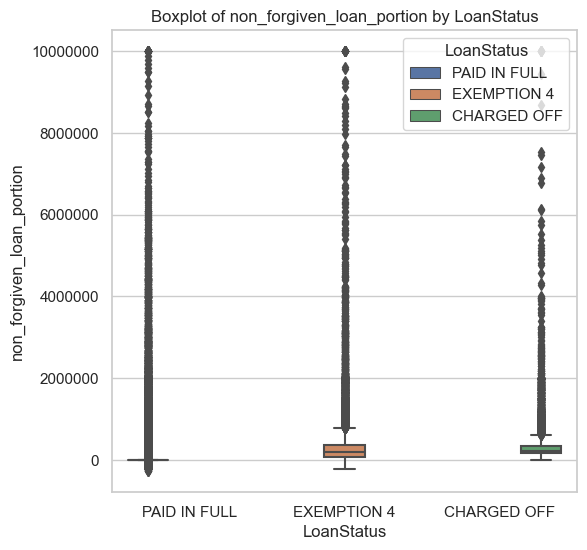

In [429]:
plt.figure(figsize=(6, 6))  # Adjust the size as needed (width, height in inches)

# Create boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, x='LoanStatus', y='non_forgiven_loan_portion', hue = 'LoanStatus')

# Set labels and title
ax.set_xlabel('LoanStatus')
ax.set_ylabel('non_forgiven_loan_portion')
ax.set_title('Boxplot of non_forgiven_loan_portion by LoanStatus')

# Format the y-axis tick labels to prevent scientific notation
ax.ticklabel_format(axis='y', style='plain')

plt.show()

The SBA guarantee encourages lenders to grant credit that otherwise would not be available. If the borrower fails to pay the loan, the lender can usually obtain up to 85% of the outstanding loan principal from the SBA.

As seen in the description statistics for the df, all the SBA offered 100% guarantees to all successful loan applicants.

Let's investigate and see if there were any loans that had updated approval amounts (the difference between InitialApprovalAmount and CurrentApprovalAmount

In [430]:
sum(df['InitialApprovalAmount'] - df['CurrentApprovalAmount'])

1581256748.4797986

$1.58 BN - Investigate why this is different. Are loans being approved at one amount (on DateApproved) and then adjusted by the time they are disbursed (LoanStatusDate)?

LoanStatusDescription values can either be 'Paid in Full', 'Exemption 4' (aka disbursed but not paid in full), or 'Charged Off'.

Is there any difference in ApprovalDifference for each LoanStatus?

Let's introduce a feature containing the difference between InitialApprovalAmount and CurrentApprovalAmount.

In [431]:
df['ApprovalDifference'] = df['CurrentApprovalAmount'] - df['InitialApprovalAmount']
df['ApprovalDifference'].describe()

count     965552.00
mean       -1637.67
std       104665.61
min     -9843546.00
25%            0.00
50%            0.00
75%            0.00
max      8928530.00
Name: ApprovalDifference, dtype: float64

In [432]:
# Calculate summary statistics
summary_stats = df.groupby('LoanStatus')['ApprovalDifference'].describe()
summary_stats = summary_stats.apply(lambda x: x.apply(lambda y: f'{y:,.2f}'))


# Display summary statistics as table
summary_stats.transpose()

LoanStatus,CHARGED OFF,EXEMPTION 4,PAID IN FULL
count,"16,083.00","16,825.00","932,644.00"
mean,"-1,001.79","1,374.18","-1,702.97"
std,"117,781.76","197,099.10","101,986.57"
min,"-5,646,988.33","-9,799,540.00","-9,843,546.00"
25%,0.00,0.00,0.00
50%,0.00,0.00,0.00
75%,0.00,0.00,0.00
max,"8,000,000.00","7,982,127.00","8,928,530.00"


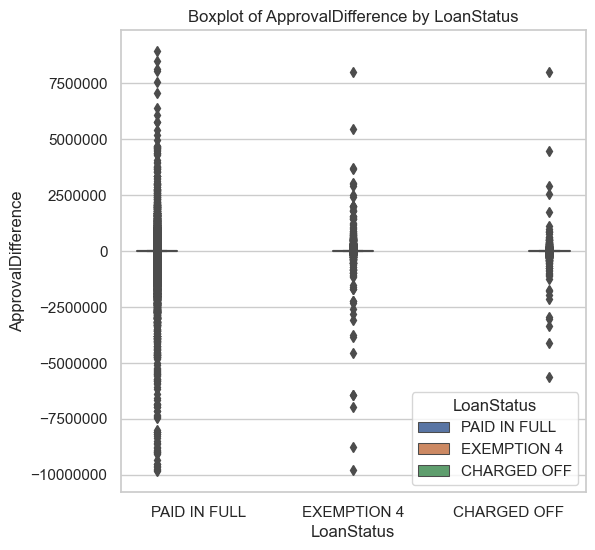

In [433]:
plt.figure(figsize=(6, 6))  # Adjust the size as needed (width, height in inches)

# Create boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, x='LoanStatus', y='ApprovalDifference', hue = 'LoanStatus')

# Set labels and title
ax.set_xlabel('LoanStatus')
ax.set_ylabel('ApprovalDifference')
ax.set_title('Boxplot of ApprovalDifference by LoanStatus')

# Format the y-axis tick labels to prevent scientific notation
ax.ticklabel_format(axis='y', style='plain')

plt.show()

Let's standardize UpdatedApprovalAmount by number of employees disclosed in order to better understand patterns in this area of the data.

In [434]:
df['ApprovalDifference_per_employee'] = df['ApprovalDifference'] / df['JobsReported']
df.head(20)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150-9662,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150-9662,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420-9000,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420-9000,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Landscaping Services,43.94,1,-9408.45,0.00,0.00
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,UNKNOWN/NOTSTATED,98112-2922,2021-03-17,PAID IN FULL,24,100,691355.00,691355.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SEATTLE,KING,WA,98112-2922,WA-07,75.00,0.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,691355.00,0.00,0.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,UNANSWERED,UNANSWERED,Y,696677.49,2021-02-10,0,1,0,0,0,0,0,UNKNOWN/NOTSTATED,51.29,1,-5322.49,0.00,0.00
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,UNKNOWN/NOTSTATED,92407-1740,2021-10-16,PAID IN FULL,24,100,499871.00,499871.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-23,21.00,236115.00,AMERICAN INDIAN OR ALASKA NATIVE,NOT HISPANIC OR LATINO,0.00,499871.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,MALE OWNED,NON-VETERAN,N,395264.11,2021-09-10,0,1,0,0,0,0,0,New Single-family Housing Construction (Except...,31.35,1,104606.89,0.00,0.00
4,9662437702,2020-05-01,101,PPP,AERO BOX LLC,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,2021-08-17,PAID IN FULL,24,100,367437.00,367437.00,0.00,UNKNOWN/NOTSTATED,57328,THE HUNTINGTON NATIONAL BANK,17 S HIGH ST.,COLUMBUS,OH,43215-3413,U,N,N,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UNKNOWN/NOTSTATED,UN

In [435]:
sum(df['ApprovalDifference_per_employee'].notna())

965549

Only 4 loans return an NaN value for UpdatedApprovalDifference_per_employee

In [436]:
# Calculate summary statistics
standardized_summary_stats = df.groupby('LoanStatus')['ApprovalDifference_per_employee'].describe()
standardized_summary_stats = standardized_summary_stats.apply(lambda x: x.apply(lambda y: f'{y:,.2f}'))


# Display summary statistics as table
standardized_summary_stats.transpose()

LoanStatus,CHARGED OFF,EXEMPTION 4,PAID IN FULL
count,"16,083.00","16,825.00","932,641.00"
mean,6.07,413.77,inf
std,"6,233.09","24,037.25",nan
min,"-514,684.38","-2,449,885.00","-1,225,700.00"
25%,0.00,0.00,0.00
50%,0.00,0.00,0.00
75%,0.00,0.00,0.00
max,"298,961.66","1,140,303.86",inf


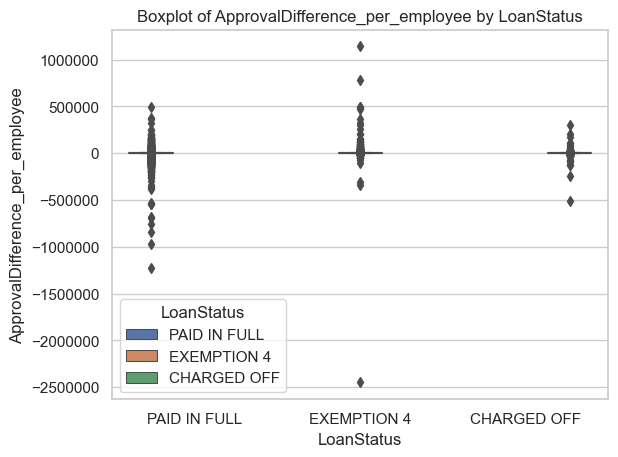

In [437]:
# Create boxplot
sns.set(style="whitegrid")
ax = sns.boxplot(data=df, x='LoanStatus', y='ApprovalDifference_per_employee', hue = 'LoanStatus')

# Set labels and title
ax.set_xlabel('LoanStatus')
ax.set_ylabel('ApprovalDifference_per_employee')
ax.set_title('Boxplot of ApprovalDifference_per_employee by LoanStatus')

# Format the y-axis tick labels to prevent scientific notation
ax.ticklabel_format(axis='y', style='plain')

plt.show()

After standardizing by employee, we can see outliers easier. Exemption 4 is a Loan Status indicating that the loan has been disbursed by the lender but not paid in full by the borrower.

We note the extreme outlier for Exemption 4 and will identify this individual loan for further analysis.

In [438]:
df[(df['LoanStatus'] == 'Exemption 4') & (df['ApprovalDifference_per_employee'] == 2449885.00)]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee


Find below a link to the company website for 'Progressive Packaging Corporation'. While unconfirmed, we believe this to be the official company website:

http://progressivepak.com/

In [439]:
df[(df['LoanStatus'] == 'Exemption 4')].sort_values(by=['ApprovalDifference_per_employee']).head(1)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee


Upon further investigation, we can see that '47th and 7th LLC' appears to have been approved for a USD 5000 microenterprise loan under the name '47th and 7th LLC dba Forever I love America' (PhillyMag, 2020) but the Current Approval Amount rose to $7,986,873 despite the company being a 'New Business or 2 years or less', reporting only 7 jobs and leaving Race, Ethnicity, Gender, Veteran unanswered as identifying variables on their application.

https://www.phillymag.com/news/2020/05/14/philadelphia-coronavirus-relief-fund-grants/

Below appears to be an X (Twitter) profile for company:

https://twitter.com/ForeverILoveAm1

Below appears to be an Instagram profile for the company:

https://www.instagram.com/foreveriloveamerica/

We will continue to analyze and normalize the data by number of employees as this seems to be an indicator for anomalous observations.

In [440]:
# Calculate summary statistics
charged_off_summary_stats = df[df['LoanStatus']=='Charged Off'].describe()
charged_off_summary_stats = charged_off_summary_stats.apply(lambda x: x.apply(lambda y: f'{y:,.2f}'))


# Display summary statistics as table
charged_off_summary_stats

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee
count,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
std,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
max,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [441]:
df.describe()

,LoanNumber,SBAOfficeCode,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,ServicingLenderLocationID,JobsReported,NAICSCode,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,OriginatingLenderLocationID,ForgivenessAmount,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee
count,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965552.00,965549.00
mean,5426351637.85,571.14,36.31,100.00,531600.10,529962.43,5.38,106619.12,51.91,508340.94,5234.20,513292.55,2244.92,5767.66,162.76,2787.45,470.67,106167.18,513614.97,0.35,1.00,0.05,0.10,0.02,0.06,0.03,140.40,0.97,16347.46,-1637.67,inf
std,2551023609.39,262.72,17.30,0.00,743460.36,737069.55,3569.51,131046.83,67.56,185625.87,50826.68,712999.15,35964.15,39522.26,9604.13,27439.66,10370.10,132804.22,726629.07,0.48,0.04,0.21,0.30,0.15,0.24,0.18,252.66,0.16,187302.57,104665.61,NaN
min,1000007108.00,101.00,0.00,100.00,0.00,150000.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,0.00,-276577.78,-9843546.00,-2449885.00
25%,3269582653.25,373.00,24.00,100.00,200100.00,200300.00,0.00,32708.00,18.00,335931.00,0.00,195115.00,0.00,0.00,0.00,0.00,0.00,29805.00,195104.41,0.00,1.00,0.00,0.00,0.00,0.00,0.00,39.84,1.00,-4532.43,0.00,0.00
50%,5399787156.00,515.00,24.00,100.00,294984.43,294800.00,0.00,56102.00,30.00,541211.00,0.00,286201.50,0.00,0.00,0.00,0.00,0.00,56102.00,287187.81,0.00,1.00,0.00,0.00,0.00,0.00,0.00,51.29,1.00,-2446.60,0.00,0.00
75%,7545707252.75,811.00,60.00,100.00,539500.00,538479.25,0.00,113154.00,54.00,622310.00,1.00,522967.25,0.00,0.00,0.00,0.00,0.00,110523.00,526962.13,1.00,1.00,0.00,0.00,0.00,0.00,0.00,85.09,1.00,-1501.26,0.00,0.00
max,9999007109.00,1094.00,203.00,100.00,10000000.00,10000000.00,3346517.14,596038.00,500.00,999990.00,10000000.00,10000000.00,10000000.00,5518277.93,2951590.00,3880000.00,2497617.00,533479.00,10276577.78,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1500.00,1.00,10000000.00,8928530.00,inf


In [442]:
# List of column names for which we want to calculate per-employee values
columns_to_normalize = ['InitialApprovalAmount', 'CurrentApprovalAmount', 'UTILITIES_PROCEED', 'PAYROLL_PROCEED',
                     'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED',
                     'HEALTH_CARE_PROCEED', 'DEBT_INTEREST_PROCEED', 'ForgivenessAmount', 'ApprovalDifference']

# Loop through the columns and calculate per-employee values
for column in columns_to_normalize:
    new_column_name = column + '_per_employee'
    df[new_column_name] = df[column] / df['JobsReported']

df.head()

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150-9662,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150-9662,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420-9000,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420-9000,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Landscaping Services,43.94,1,-9408.45,0.00,0.00,10094.90,10094.90,0.00,10094.90,0.00,0.00,0.00,0.00,0.00,10223.78
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,UNKNOWN/NOTSTATED,98112-2922,2021-03-17,PAID IN FULL,24,100,691355.00,691355.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SEATTLE,KING,WA,98112-2922,WA-07,75.00,0.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,691355.00,0.00,0.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,UNANSWERED,UNANSWERED,Y,696677.49,2021-02-10,0,1,0,0,0,0,0,UNKNOWN/NOTSTATED,51.29,1,-5322.49,0.00,0.00,9218.07,9218.07,0.00,9218.07,0.00,0.00,0.00,0.00,0.00,9289.03
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,UNKNOWN/NOTSTATED,92407-1740,2021-10-16,PAID IN FULL,24,100,499871.00,499871.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-23,21.00,236115.00,AMERICAN INDIAN OR ALASKA NATIVE,NOT HISPANIC OR LATINO,0.00,499871.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,9551,"BANK OF A

In [443]:
df[df['NAICSCode']==325510.00]

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150-9662,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150-9662,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67
3531,2743777209,2020-04-16,459,PPP,MOBILE PAINT MANUFACTURING COMPANY OF DELAWARE...,"4775 HAMILTON BLVD,",THEODORE,AL,36582-8509,2021-04-09,PAID IN FULL,24,100,1195600.00,1195600.00,0.00,UNKNOWN/NOTSTATED,2408,REGIONS BANK,1900 FIFTH AVENUE NORTH,BIRMINGHAM,AL,35203,U,N,Y,EXISTING OR MORE THAN 2 YEARS OLD,THEODORE,MOBILE,AL,36582-8509,AL-01,122.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,1195600.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,2408,REGIONS BANK,BIRMINGHAM,AL,UNANSWERED,UNANSWERED,N,1206344.02,2021-03-25,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-10744.02,0.00,0.00,9800.00,9800.00,0.00,9800.00,0.00,0.00,0.00,0.00,0.00,9888.07
4601,4993247205,2020-04-27,459,PPP,ABC APPLICATORS INC,4470 MCCRARY ROAD,SEMMES,AL,36575-4440,2021-03-06,PAID IN FULL,24,100,678800.00,678800.00,0.00,UNKNOWN/NOTSTATED,39217,COMMUNITY BANK OF MISSISSIPPI,323 E THIRD ST,FOREST,MS,39074-0059,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SEMMES,MOBILE,AL,36575-4440,AL-01,104.00,325510.00,WHITE,NOT HISPANIC OR LATINO,57400.00,611100.00,0.00,0.00,0.00,10300.00,0.00,CORPORATION,39217,COMMUNITY BANK OF MISSISSIPPI,FOREST,MS,MALE OWNED,NON-VETERAN,N,684044.43,2021-02-05,1,1,0,0,0,1,0,Paint and Coating Manufacturing,1000.00,1,-5244.43,0.00,0.00,6526.92,6526.92,551.92,5875.96,0.00,0.00,0.00,99.04,0.00,6577.35
4723,3141438401,2021-02-04,459,PPS,INDURON COATINGS LLC,3333R RICHARD ARRINGTON JR BLVD N,BIRMINGHAM,AL,35234-2303,2021-11-13,PAID IN FULL,60,100,653796.00,653796.00,0.00,UNKNOWN/NOTSTATED,434138,SERVISFIRST BANK,2500 WOODCREST PLACE,BIRMINGHAM,AL,35209-1374,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,BIRMINGHAM,JEFFERSON,AL,35234-2303,AL-07,36.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,1.00,653794.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC),434138,SERVISFIRST BANK,BIRMINGHAM,AL,UNANSWERED,UNANSWERED,N,658427.06,202

In [444]:
check2 = df[df['ApprovalDifference_per_employee'].isnull()]
check2

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee
122552,6557167306,2020-04-30,914,PPP,ST. MARGARET MARY SCHOOL,25515 ESHELMAN,LOMITA,CA,90717,2021-10-21,PAID IN FULL,24,100,223364.00,223364.00,0.00,UNKNOWN/NOTSTATED,12096,"WELLS FARGO BANK, NATIONAL ASSOCIATION",101 N PHILIPS AVE,SIOUX FALLS,SD,57104-6738,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,LOMITA,LOS ANGELES,CA,90717,CA-33,0.00,611110.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,223364.00,0.00,0.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,12096,"WELLS FARGO BANK, NATIONAL ASSOCIATION",SIOUX FALLS,SD,UNANSWERED,UNANSWERED,Y,226387.06,2021-09-15,0,1,0,0,0,0,0,Elementary and Secondary Schools,72.52,1,-3023.06,0.00,NaN,inf,inf,NaN,inf,NaN,NaN,NaN,NaN,NaN,inf
548743,5780187005,2020-04-06,766,PPP,"RELIANT TRANSPORTATION, INC.",4411 S 86TH STREET,LINCOLN,NE,68526-9225,2021-03-11,PAID IN FULL,24,100,594600.00,594600.00,0.00,UNKNOWN/NOTSTATED,42246,FIRST STATE BANK NEBRASKA,2701 GRAINGER PKWY,LINCOLN,NE,68516-7764,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,LINCOLN,LANCASTER,NE,68526-9225,NE-01,0.00,484220.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,594600.00,0.00,0.00,0.00,0.00,0.00,CORPORATION,42246,FIRST STATE BANK NEBRASKA,LINCOLN,NE,MALE OWNED,UNANSWERED,N,599571.52,2021-02-10,0,1,0,0,0,0,0,Specialized Freight (except Used Goods) Trucki...,43.19,1,-4971.52,0.00,NaN,inf,inf,NaN,inf,NaN,NaN,NaN,NaN,NaN,inf
761171,4864227203,2020-04-27,303,PPP,VINCERA REHAB LLC,"1200 CONSTITUTION AVE, STE 210",PHILADELPHIA,PA,19112-1306,2021-04-14,PAID IN FULL,24,100,212300.00,212300.00,0.00,UNKNOWN/NOTSTATED,449391,"CHAIN BRIDGE BANK, NATIONAL ASSOCIATION",1445-A LAUGHLIN AVE,MCLEAN,VA,22101-5709,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,PHILADELPHIA,PHILADELPHIA,PA,19112-1306,PA-05,0.00,622310.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,212300.00,0.00,0.00,0.00,0.00,0.00,LIMITED LIABILITY COMPANY(LLC),449391,"CHAIN BRIDGE BANK, NATIONAL ASSOCIATION",MCLEAN,VA,UNANSWERED,UNANSWERED,N,214204.80,2021-03-31,0,1,0,0,1,0,0,Specialty (except Psychiatric and Substance Ab...,88.26,1,-1904.80,0.00,NaN,inf,inf,NaN,inf,NaN,NaN,NaN,NaN,NaN,inf


In [445]:
df.isnull().sum()

LoanNumber                                0
DateApproved                              0
SBAOfficeCode                             0
ProcessingMethod                          0
BorrowerName                              0
BorrowerAddress                           0
BorrowerCity                              0
BorrowerState                             0
BorrowerZip                               0
LoanStatusDate                            0
LoanStatus                                0
Term                                      0
SBAGuarantyPercentage                     0
InitialApprovalAmount                     0
CurrentApprovalAmount                     0
UndisbursedAmount                         0
FranchiseName                             0
ServicingLenderLocationID                 0
ServicingLenderName                       0
ServicingLenderAddress                    0
ServicingLenderCity                       0
ServicingLenderState                      0
ServicingLenderZip              

### Checking for Multiple Applications

In [446]:
# Filter under processing method
filtered_df = df[df['ProcessingMethod'].isin(['PPP', 'PPS'])]

# Group based on 'BorrowerName', 'BorrowerAddress', and 'ProcessingMethod'
grouped = filtered_df.groupby(['BorrowerName', 'BorrowerAddress', 'ProcessingMethod']).size().reset_index(name='Count')

# Pivot to get 'PPP Count' and 'PPS Count' as columns
pivot_table = grouped.pivot_table(index=['BorrowerName', 'BorrowerAddress'], columns='ProcessingMethod', values='Count', fill_value=0).reset_index()

# Display in decending order under ppp
pivot_table.sort_values(by='PPP', ascending=False).head()

ProcessingMethod,BorrowerName,BorrowerAddress,PPP,PPS
783085,"STUDENT ALTERNATIVES PROGRAM, INC.",707 LINDBERG AVE.,4,0
735193,SHAKOPEE MDEWAKANTON SIOUX COMMUNITY,2400 MYSTIC LAKE BLVD,3,0
356666,GUSTAVO GARCIA-SILLER ARCHBISHOP OF SAN ANTONI...,2718 W WOODLAWN AVE,3,0
365335,HARRELSON UTILITY REPAIR AND CONTRACTING INC,1310 OLD US HIGHWAY 264,3,0
155006,CATHOLIC CHARITIES OF THE DIOCESE OF ROCHESTER,94 EXCHANGE STREET,3,0


In [447]:
# Display in decending order under pps
pivot_table.sort_values(by='PPS', ascending=False).head()

ProcessingMethod,BorrowerName,BorrowerAddress,PPP,PPS
104076,BIG NIGHT VENUES BOSTON,470 ATLANTIC AVE STE 301,0,7
581543,NORMA'S CAFE,4275 KELLWAY CIR STE 106,0,3
424900,JASON HELEVA,67 WEST ST STE 301,0,2
858867,TZZ LLC,157 RAYE ST,0,2
301400,FIRST CHURCH OF THE NAZARENE OF FORT WORTH TEXAS,2001 E MAIN ST,0,2


In [448]:
# Create new columns 'Prior PPP count' and 'Prior PPS count' to count how many times a borrower applied before current approval date for each processing method
df['Prior PPP count'] = (df[df['ProcessingMethod'] == 'PPP']
                                  .groupby(['BorrowerName', 'BorrowerAddress'])['DateApproved']
                                  .rank(method='first', ascending=True)
                                  .sub(1)
                                  .astype(int))

df['Prior PPS count'] = (df[df['ProcessingMethod'] == 'PPS']
                                  .groupby(['BorrowerName', 'BorrowerAddress'])['DateApproved']
                                  .rank(method='first', ascending=True)
                                  .sub(1)
                                  .astype(int))
df.head(10)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150-9662,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150-9662,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0.00,NaN
1,9777677704,2020-05-01,464,PPP,"PLEASANT PLACES, INC.",7684 SOUTHRAIL ROAD,NORTH CHARLESTON,UNKNOWN/NOTSTATED,29420-9000,2021-09-28,PAID IN FULL,24,100,736927.79,736927.79,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901-2429,U,Y,Y,EXISTING OR MORE THAN 2 YEARS OLD,NORTH CHARLESTON,CHARLESTON,SC,29420-9000,SC-06,73.00,561730.00,WHITE,UNKNOWN/NOTSTATED,0.00,736927.79,0.00,0.00,0.00,0.00,0.00,SOLE PROPRIETORSHIP,19248,SYNOVUS BANK,COLUMBUS,GA,MALE OWNED,NON-VETERAN,N,746336.24,2021-08-12,0,1,0,0,0,0,0,Landscaping Services,43.94,1,-9408.45,0.00,0.00,10094.90,10094.90,0.00,10094.90,0.00,0.00,0.00,0.00,0.00,10223.78,0.00,NaN
2,5791407702,2020-05-01,1013,PPP,BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,UNKNOWN/NOTSTATED,98112-2922,2021-03-17,PAID IN FULL,24,100,691355.00,691355.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SEATTLE,KING,WA,98112-2922,WA-07,75.00,0.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,691355.00,0.00,0.00,0.00,0.00,0.00,NON-PROFIT ORGANIZATION,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION",CHARLOTTE,NC,UNANSWERED,UNANSWERED,Y,696677.49,2021-02-10,0,1,0,0,0,0,0,UNKNOWN/NOTSTATED,51.29,1,-5322.49,0.00,0.00,9218.07,9218.07,0.00,9218.07,0.00,0.00,0.00,0.00,0.00,9289.03,0.00,NaN
3,6223567700,2020-05-01,920,PPP,KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,UNKNOWN/NOTSTATED,92407-1740,2021-10-16,PAID IN FULL,24,100,499871.00,499871.00,0.00,UNKNOWN/NOTSTATED,9551,"BANK OF AMERICA, NATIONAL ASSOCIATION","100 N TRYON ST, STE 170",CHARLOTTE,NC,28202-4024,U,N,N,NEW BUSINESS OR 2 YEARS OR LESS,SAN BERNARDINO,SAN BERNARDINO,CA,92407-1740,CA-23,21.00,236115.00,AMERICAN INDIAN OR ALASKA NATIVE,NOT HISPANIC OR LATINO,0.00,499

In [449]:
# Replace NaN values with zero
df['Prior PPP count'] = df['Prior PPP count'].fillna(0).astype(int)
df['Prior PPS count'] = df['Prior PPS count'].fillna(0).astype(int)

In [450]:
filtered_df = df[df['BorrowerName'] == 'BIG NIGHT VENUES BOSTON']
result_df = filtered_df[['BorrowerName', 'BorrowerAddress', 'DateApproved','ProcessingMethod', 'Prior PPP count','Prior PPS count' ]]
result_df

,BorrowerName,BorrowerAddress,DateApproved,ProcessingMethod,Prior PPP count,Prior PPS count
397923,BIG NIGHT VENUES BOSTON,470 ATLANTIC AVE STE 301,2021-04-15,PPS,0,6
398114,BIG NIGHT VENUES BOSTON,470 ATLANTIC AVE STE 301,2021-03-20,PPS,0,4
399209,BIG NIGHT VENUES BOSTON,470 ATLANTIC AVE STE 301,2021-02-26,PPS,0,1
399321,BIG NIGHT VENUES BOSTON,470 ATLANTIC AVE STE 301,2021-04-02,PPS,0,5
403236,BIG NIGHT VENUES BOSTON,470 ATLANTIC AVE STE 301,2021-02-26,PPS,0,2
406045,BIG NIGHT VENUES BOSTON,470 ATLANTIC AVE STE 301,2021-02-05,PPS,0,0
416526,BIG NIGHT VENUES BOSTON,470 ATLANTIC AVE STE 301,2021-02-26,PPS,0,3


Some borrowers applied directly for PPS loans despite not utilizing PPP first draw loans. They also applied for multiple PPS loans when businesses are only allowed to apply for each draw loan once.

In [451]:
len(df)

965552

In [452]:
def standard_zip(df,zip_col):
        df[zip_col] = df[zip_col].str[:5]

zips = ['BorrowerZip', 'ServicingLenderZip', 'ProjectZip']

for zip in zips:
    standard_zip(df, zip)

df.head(1)

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate,UTILITIES_PROCEED_purpose,PAYROLL_PROCEED_purpose,MORTGAGE_INTEREST_PROCEED_purpose,RENT_PROCEED_purpose,REFINANCE_EIDL_PROCEED_purpose,HEALTH_CARE_PROCEED_purpose,DEBT_INTEREST_PROCEED_purpose,NAICS Industry Description,Size standards in number of employees,Forgiven,non_forgiven_loan_portion,ApprovalDifference,ApprovalDifference_per_employee,InitialApprovalAmount_per_employee,CurrentApprovalAmount_per_employee,UTILITIES_PROCEED_per_employee,PAYROLL_PROCEED_per_employee,MORTGAGE_INTEREST_PROCEED_per_employee,RENT_PROCEED_per_employee,REFINANCE_EIDL_PROCEED_per_employee,HEALTH_CARE_PROCEED_per_employee,DEBT_INTEREST_PROCEED_per_employee,ForgivenessAmount_per_employee,Prior PPP count,Prior PPS count
0,9547507704,2020-05-01,464,PPP,"SUMTER COATINGS, INC.",2410 HIGHWAY 15 SOUTH,SUMTER,UNKNOWN/NOTSTATED,29150,2020-12-18,PAID IN FULL,24,100,769358.78,769358.78,0.00,UNKNOWN/NOTSTATED,19248,SYNOVUS BANK,1148 BROADWAY,COLUMBUS,GA,31901,U,N,N,EXISTING OR MORE THAN 2 YEARS OLD,SUMTER,SUMTER,SC,29150,SC-05,62.00,325510.00,UNANSWERED,UNKNOWN/NOTSTATED,0.00,769358.78,0.00,0.00,0.00,0.00,0.00,CORPORATION,19248,SYNOVUS BANK,COLUMBUS,GA,UNANSWERED,UNANSWERED,N,773553.37,2020-11-20,0,1,0,0,0,0,0,Paint and Coating Manufacturing,1000.00,1,-4194.59,0.00,0.00,12409.01,12409.01,0.00,12409.01,0.00,0.00,0.00,0.00,0.00,12476.67,0,0


# FURTHER EDA

In [453]:
def detect_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data < lower_bound) | (data > upper_bound)]

initial_outliers = detect_outliers(df['InitialApprovalAmount'])
current_outliers = detect_outliers(df['CurrentApprovalAmount'])

print(f"Number of outliers in Initial Approval Amount: {len(initial_outliers)}")
print(f"Number of outliers in Current Approval Amount: {len(current_outliers)}")


Number of outliers in Initial Approval Amount: 101545
Number of outliers in Current Approval Amount: 101366


### Filter the companies where current amt is less than 80% of initial amount

In [454]:
# Step 1: Filter the companies
threshold = 0.7
significant_reduction_df = df[df['CurrentApprovalAmount'] < threshold * df['InitialApprovalAmount']]

significant_reduction_df.BorrowerName.nunique()
# Display these companies
#print(significant_reduction_df[['BorrowerName', 'InitialApprovalAmount', 'CurrentApprovalAmount']])


3461

### NAICS codes in which these companies are there

In [455]:
# Grouping by NAICSCode and counting unique companies
naics_counts = significant_reduction_df.groupby('NAICSCode')['BorrowerName'].nunique()

# Filtering NAICS codes with count > 5
naics_counts = naics_counts[naics_counts >= 15]

# Displaying the NAICS codes and their respective counts
print(naics_counts.sort_values(ascending=False))


NAICSCode
621111.00    147
722511.00    116
541110.00     80
236220.00     68
621610.00     67
621210.00     61
721110.00     58
238220.00     54
813110.00     51
238210.00     45
541511.00     37
453998.00     36
441110.00     36
611110.00     35
238990.00     35
541330.00     34
541611.00     33
236115.00     33
484121.00     29
484110.00     29
236118.00     29
541512.00     28
722513.00     28
561320.00     28
524210.00     28
541990.00     27
0.00          27
561311.00     25
561730.00     23
541613.00     22
561110.00     21
541618.00     20
621399.00     19
999990.00     19
531210.00     19
238910.00     18
541519.00     18
621999.00     17
531120.00     17
561720.00     16
531311.00     16
812112.00     15
238140.00     15
Name: BorrowerName, dtype: int64


In [456]:
# Filtering companies with NAICSCode as 0 or "0.00"
companies_with_naics_zero = significant_reduction_df[significant_reduction_df['NAICSCode'].isin([0, "0.00"])]

# Displaying these companies
print(companies_with_naics_zero['BorrowerName'])


72495                                         EHT FPSJ, LLC
82133                     HEALTHCARE MANAGEMENT SYSTEMS INC
133083                                             B K MILL
136632                         J & J BUILDING COMPANY, INC.
142010                                 JAY GROSSMAN DDS INC
251689                  COMMERCIAL RENOVATION SERVICES, INC
252928                                MARTIN CONSULTING INC
265458                                     M9 SOLUTIONS LLC
281626                                    FAMILY THRIFT INC
318153    PRINCETON REHABILITATION AND HEALTH CARE CENTE...
334365                            RAM FUND, INC. DBA BOYDEN
348534     CANOPY SPECIALTY INSURANCE LLC-SBA SMALL 7A TERM
460533                                        THE PAC GROUP
462120    V.O.I.C.E. INC. OF MICHIGAN, DBA VALLEY ORGANI...
478276                 MONARCH HEALTHCARE OPERATING VII LLC
579168                                BEVERLY FREIGHT, INC.
625081           VCC, INC. DBA CICERO CO

### Loan Applications Counts by NAICS Industry


In [457]:
# Total amount borrowed for PPP and PPS
ppp_total_amount = df[df['ProcessingMethod'] == 'PPP']['CurrentApprovalAmount'].sum()
pps_total_amount = df[df['ProcessingMethod'] == 'PPS']['CurrentApprovalAmount'].sum()

print(f"Total amount borrowed for PPP: ${ppp_total_amount}")
print(f"Total amount borrowed for PPS: ${pps_total_amount}")

# Time difference analysis
# Assuming each borrower has a unique BorrowerName
ppp_dates = df[df['ProcessingMethod'] == 'PPP'].set_index('BorrowerName')['DateApproved']
pps_dates = df[df['ProcessingMethod'] == 'PPS'].set_index('BorrowerName')['DateApproved']

time_difference = (pps_dates - ppp_dates).dropna()
average_time_difference = time_difference.mean()

print(f"Average time between borrowing PPP and PPS: {average_time_difference}")


Total amount borrowed for PPP: $384943225732.42993
Total amount borrowed for PPS: $126763059491.39998
Average time between borrowing PPP and PPS: 301 days 18:05:03.262489652


### None of these companies applied for PPS (2nd loan amount)
##### Why do some of them have higher forgiveness amount thand approval amounts??

### Comparison of Forgiveness Amount and Payroll Proceed

In [458]:
correlation = df['PAYROLL_PROCEED'].corr(df['ForgivenessAmount'])
print(f"Correlation between Forgiveness Amount and Payroll Proceed: {correlation:.2f}")


Correlation between Forgiveness Amount and Payroll Proceed: 0.96


### Top Lenders 

In [459]:
import matplotlib.pyplot as plt

# Filter dataset for PPP and PPS
ppp_data = df[df['ProcessingMethod'] == 'PPP']
pps_data = df[df['ProcessingMethod'] == 'PPS']

# Get top 5 lenders for PPP
top_ppp_lenders = ppp_data['ServicingLenderName'].value_counts().head(5)
print(top_ppp_lenders)

JPMORGAN CHASE BANK, NATIONAL ASSOCIATION    40548
BANK OF AMERICA, NATIONAL ASSOCIATION        30213
PNC BANK, NATIONAL ASSOCIATION               18772
TRUIST BANK                                  15988
WELLS FARGO BANK, NATIONAL ASSOCIATION       12571
Name: ServicingLenderName, dtype: int64


In [460]:
# Get top 5 lenders for PPS
top_pps_lenders = pps_data['ServicingLenderName'].value_counts().head(5)
print(top_pps_lenders)

JPMORGAN CHASE BANK, NATIONAL ASSOCIATION    16673
BANK OF AMERICA, NATIONAL ASSOCIATION        10046
LOAN SOURCE INCORPORATED                      8492
PNC BANK, NATIONAL ASSOCIATION                6688
MANUFACTURERS AND TRADERS TRUST COMPANY       5409
Name: ServicingLenderName, dtype: int64


In [461]:
df.isnull().sum()

LoanNumber                                0
DateApproved                              0
SBAOfficeCode                             0
ProcessingMethod                          0
BorrowerName                              0
BorrowerAddress                           0
BorrowerCity                              0
BorrowerState                             0
BorrowerZip                               0
LoanStatusDate                            0
LoanStatus                                0
Term                                      0
SBAGuarantyPercentage                     0
InitialApprovalAmount                     0
CurrentApprovalAmount                     0
UndisbursedAmount                         0
FranchiseName                             0
ServicingLenderLocationID                 0
ServicingLenderName                       0
ServicingLenderAddress                    0
ServicingLenderCity                       0
ServicingLenderState                      0
ServicingLenderZip              

In [462]:
# create a boolean mask to filter the data
mask = df['Size standards in number of employees'].isnull()

# use boolean indexing to filter the data and group by 'NAICS Codes'
naics_nullcounts = df.loc[mask].groupby('NAICSCode').size()

# Find mean jobs reported by NAICS code
mean_jr = df.groupby('NAICSCode')['JobsReported'].mean()

# Impute mean jobs reported by NAICS code for missing size standards in number of employees
df['Size standards in number of employees'] = df.groupby('NAICSCode')['Size standards in number of employees'].apply(lambda x: x.fillna(mean_jr[x.name]))
df.isnull().sum()

LoanNumber                                0
DateApproved                              0
SBAOfficeCode                             0
ProcessingMethod                          0
BorrowerName                              0
BorrowerAddress                           0
BorrowerCity                              0
BorrowerState                             0
BorrowerZip                               0
LoanStatusDate                            0
LoanStatus                                0
Term                                      0
SBAGuarantyPercentage                     0
InitialApprovalAmount                     0
CurrentApprovalAmount                     0
UndisbursedAmount                         0
FranchiseName                             0
ServicingLenderLocationID                 0
ServicingLenderName                       0
ServicingLenderAddress                    0
ServicingLenderCity                       0
ServicingLenderState                      0
ServicingLenderZip              

In [463]:
# Impute UNKNOWN/NOTSTATED for missing NAICS Industry Description
df['NAICS Industry Description'] = df['NAICS Industry Description'].fillna('UNKNOWN/NOTSTATED')

# Impute 0 for missing NAICS Codes
df['NAICSCode'] = df['NAICSCode'].fillna(0)

# Impute median number size standards of employees for missing Size standards in number of employees 
df['Size standards in number of employees'] = df['Size standards in number of employees'].fillna(df['Size standards in number of employees'].median())

df.isnull().sum()

LoanNumber                                0
DateApproved                              0
SBAOfficeCode                             0
ProcessingMethod                          0
BorrowerName                              0
BorrowerAddress                           0
BorrowerCity                              0
BorrowerState                             0
BorrowerZip                               0
LoanStatusDate                            0
LoanStatus                                0
Term                                      0
SBAGuarantyPercentage                     0
InitialApprovalAmount                     0
CurrentApprovalAmount                     0
UndisbursedAmount                         0
FranchiseName                             0
ServicingLenderLocationID                 0
ServicingLenderName                       0
ServicingLenderAddress                    0
ServicingLenderCity                       0
ServicingLenderState                      0
ServicingLenderZip              

In [464]:
# Create 'Forgiven' binary feature
df['Forgiven'] = df['ForgivenessAmount'].notnull().astype(int)

# Impute median date for null ForgivenessDate
df['ForgivenessDate'] = df['ForgivenessDate'].fillna(df['ForgivenessDate'].median())

# Impute 0 for null ForgivenessAmount and ForgivenessAmount_per_employee
df['ForgivenessAmount'] = df['ForgivenessAmount'].fillna(0)

df.isnull().sum()

LoanNumber                                0
DateApproved                              0
SBAOfficeCode                             0
ProcessingMethod                          0
BorrowerName                              0
BorrowerAddress                           0
BorrowerCity                              0
BorrowerState                             0
BorrowerZip                               0
LoanStatusDate                            0
LoanStatus                                0
Term                                      0
SBAGuarantyPercentage                     0
InitialApprovalAmount                     0
CurrentApprovalAmount                     0
UndisbursedAmount                         0
FranchiseName                             0
ServicingLenderLocationID                 0
ServicingLenderName                       0
ServicingLenderAddress                    0
ServicingLenderCity                       0
ServicingLenderState                      0
ServicingLenderZip              

In [467]:
# since there are a maximum of 4 rows with null values for some of the per_employee features, we will impute those missing values with 0 for ease of data cleaning
df['ApprovalDifference_per_employee'] = df['ApprovalDifference_per_employee'].fillna(0)

df['UTILITIES_PROCEED_per_employee'] = df['UTILITIES_PROCEED_per_employee'].fillna(0)

df['MORTGAGE_INTEREST_PROCEED_per_employee'] = df['MORTGAGE_INTEREST_PROCEED_per_employee'].fillna(0)

df['RENT_PROCEED_per_employee'] = df['RENT_PROCEED_per_employee'].fillna(0)

df['REFINANCE_EIDL_PROCEED_per_employee'] = df['REFINANCE_EIDL_PROCEED_per_employee'].fillna(0)

df['HEALTH_CARE_PROCEED_per_employee'] = df['HEALTH_CARE_PROCEED_per_employee'].fillna(0)

df['DEBT_INTEREST_PROCEED_per_employee'] = df['DEBT_INTEREST_PROCEED_per_employee'].fillna(0)

df.isnull().sum()


LoanNumber                                0
DateApproved                              0
SBAOfficeCode                             0
ProcessingMethod                          0
BorrowerName                              0
BorrowerAddress                           0
BorrowerCity                              0
BorrowerState                             0
BorrowerZip                               0
LoanStatusDate                            0
LoanStatus                                0
Term                                      0
SBAGuarantyPercentage                     0
InitialApprovalAmount                     0
CurrentApprovalAmount                     0
UndisbursedAmount                         0
FranchiseName                             0
ServicingLenderLocationID                 0
ServicingLenderName                       0
ServicingLenderAddress                    0
ServicingLenderCity                       0
ServicingLenderState                      0
ServicingLenderZip              

In [469]:
df.to_csv('ppp_clean.csv', index = False)

### This is the end of the first iteration of data cleaning. Please open the 'PPP Additional Feature Engineering.ipynb' notebook to access feature engineering of risk scores for all loans.